In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


# Task 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SHODH_AI/accepted_2007_to_2018Q4.csv')

/tmp/ipython-input-3950551440.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SHODH_AI/accepted_2007_to_2018Q4.csv')


In [3]:
file_path = '/content/drive/MyDrive/SHODH_AI/accepted_2007_to_2018Q4.csv'
chunk_list = []
chunk_size = 50000
with pd.read_csv(file_path, chunksize=chunk_size, low_memory=False) as reader:
    for chunk in reader:
        processed_chunk = chunk[chunk['loan_status'].isin(['Fully Paid', 'Charged Off'])]
        chunk_list.append(processed_chunk)

df = pd.concat(chunk_list, ignore_index=True)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [6]:
df['loan_status']

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
1345305,Fully Paid
1345306,Fully Paid
1345307,Charged Off
1345308,Fully Paid


## Data Preprocessing and EDA

In [7]:
df.shape

(1345310, 151)

In [11]:
# Mapping Charged Off to 1 and Fully Paid to 0
df['target_binary'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

In [12]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target_binary
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
3,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
4,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,89905081,NaN,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1345306,88948836,NaN,29400.0,29400.0,29400.0,60 months,13.99,683.94,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1345307,89996426,NaN,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1345308,90006534,NaN,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
# Get the counts for each class (0 and 1)
class_counts = df['target_binary'].value_counts()
print("Class Counts:")
print(class_counts)

print("\n" + "="*30 + "\n")

# Get the percentages for each class
class_percentages = df['target_binary'].value_counts(normalize=True) * 100
print("Class Percentages (%):")
print(class_percentages)

Class Counts:
target_binary
0    1076751
1     268559
Name: count, dtype: int64


Class Percentages (%):
target_binary
0    80.037389
1    19.962611
Name: proportion, dtype: float64


In [14]:
# 1. Total missing values
total_missing = df.isnull().sum().sum()
print(f"1. Total missing values in the DataFrame: {total_missing}")

print("\n" + "="*40 + "\n")

# 2. Missing values per column (count)
missing_per_column_count = df.isnull().sum()

print("2. Missing values per column (count):")
print(missing_per_column_count[missing_per_column_count > 0].sort_values(ascending=False))

print("\n" + "="*40 + "\n")

# 3. Percentage missing values per column
missing_per_column_percent = (df.isnull().mean() * 100)

print("3. Missing values per column (%):")
print(missing_per_column_percent[missing_per_column_percent > 0].sort_values(ascending=False))

1. Total missing values in the DataFrame: 70408128


2. Missing values per column (count):
member_id                                     1345310
next_pymnt_d                                  1345310
orig_projected_additional_accrued_interest    1341551
hardship_length                               1339556
hardship_dpd                                  1339556
                                               ...   
chargeoff_within_12_mths                           56
last_credit_pull_d                                 55
tax_liens                                          39
zip_code                                            1
inq_last_6mths                                      1
Length: 105, dtype: int64


3. Missing values per column (%):
member_id                                     100.000000
next_pymnt_d                                  100.000000
orig_projected_additional_accrued_interest     99.720585
hardship_length                                99.572292
hardship_dpd             

In [15]:

threshold = 0.35


missing_percent = df.isnull().mean()

cols_to_drop = missing_percent[missing_percent > threshold].index

print(f"Dropping {len(cols_to_drop)} columns with > {threshold*100}% missing values:")
print(list(cols_to_drop))

print("\n" + "="*40 + "\n")
original_shape = df.shape

df = df.drop(columns=cols_to_drop)

print(f"Original shape: {original_shape}")
print(f"New shape after dropping columns: {df.shape}")

Dropping 58 columns with > 35.0% missing values:
['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_st

In [13]:
df = pd.read_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_df.csv')

In [4]:
df.shape

(1345310, 95)

In [5]:
print(f"Original shape of df: {df.shape}")

df1 = df.dropna()

print(f"Shape of df1 after dropping all rows with NaNs: {df1.shape}")

Original shape of df: (1345310, 95)
Shape of df1 after dropping all rows with NaNs: (986013, 95)


In [6]:
df1.to_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_df1.csv')

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

target_binary
0    1076751
1     268559
Name: count, dtype: int64


target_binary
0    80.037389
1    19.962611
Name: proportion, dtype: float64


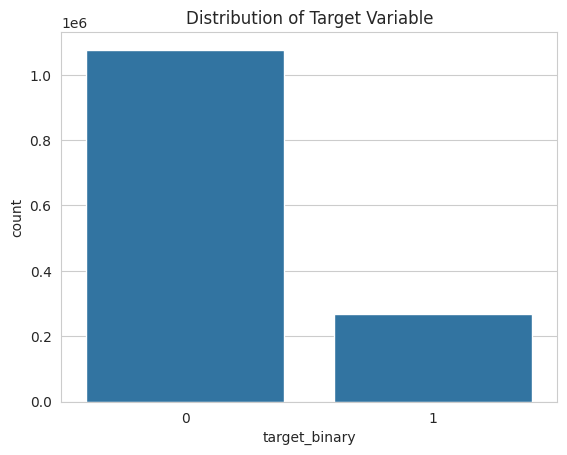

In [15]:

print(df['target_binary'].value_counts())
print("\n")
print(df['target_binary'].value_counts(normalize=True) * 100)
sns.countplot(x='target_binary', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [16]:
df.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target_binary
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,...,1.277783e+06,1.277629e+06,1.283755e+06,1.344613e+06,1.345271e+06,1.277783e+06,1.298029e+06,1.298029e+06,1.277783e+06,1.345310e+06
mean,6.726545e+05,5.634499e+07,1.441997e+04,1.441156e+04,1.438914e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,3.177944e-01,...,2.178887e+00,9.416467e+01,4.515598e+01,1.344439e-01,5.213002e-02,1.743878e+05,4.966635e+04,2.163400e+04,4.213319e+04,1.996261e-01
std,3.883577e+05,3.836114e+07,8.717051e+03,8.713118e+03,8.715494e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,8.779922e-01,...,1.845039e+00,8.744124e+00,3.600723e+01,3.779285e-01,3.979113e-01,1.780961e+05,4.774363e+04,2.155478e+04,4.325213e+04,3.997195e-01
min,0.000000e+00,5.473400e+04,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.363272e+05,2.002774e+07,8.000000e+03,8.000000e+03,7.875000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,0.000000e+00,...,1.000000e+00,9.130000e+01,1.000000e+01,0.000000e+00,0.000000e+00,4.962050e+04,2.088600e+04,7.800000e+03,1.473800e+04,0.000000e+00
50%,6.726545e+05,5.773466e+07,1.200000e+04,1.200000e+04,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,0.000000e+00,...,2.000000e+00,9.800000e+01,4.290000e+01,0.000000e+00,0.000000e+00,1.123730e+05,3.729600e+04,1.510000e+04,3.168100e+04,0.000000e+00
75%,1.008982e+06,8.454605e+07,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,0.000000e+00,...,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.520760e+05,6.254800e+04,2.810000e+04,5.663500e+04,0.000000e+00
max,1.345309e+06,1.456364e+08,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,3.900000e+01,...,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.105500e+06,2.101913e+06,1.000000e+00


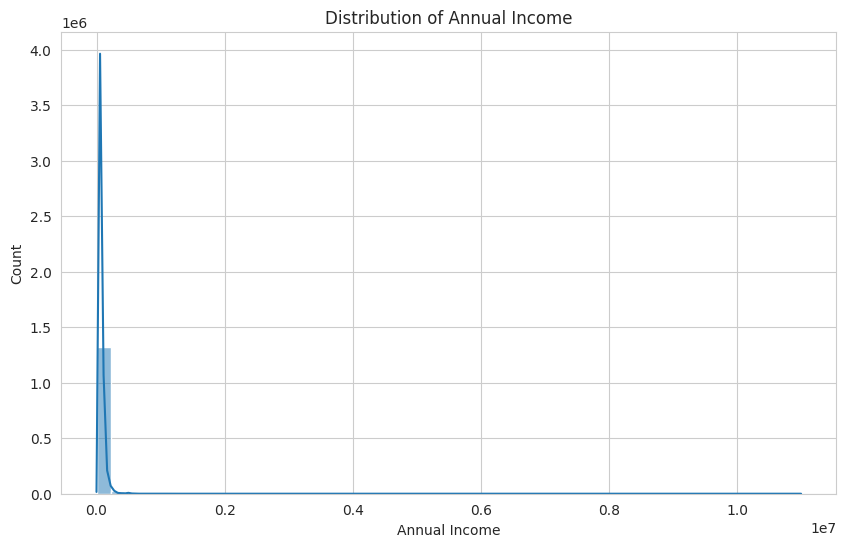

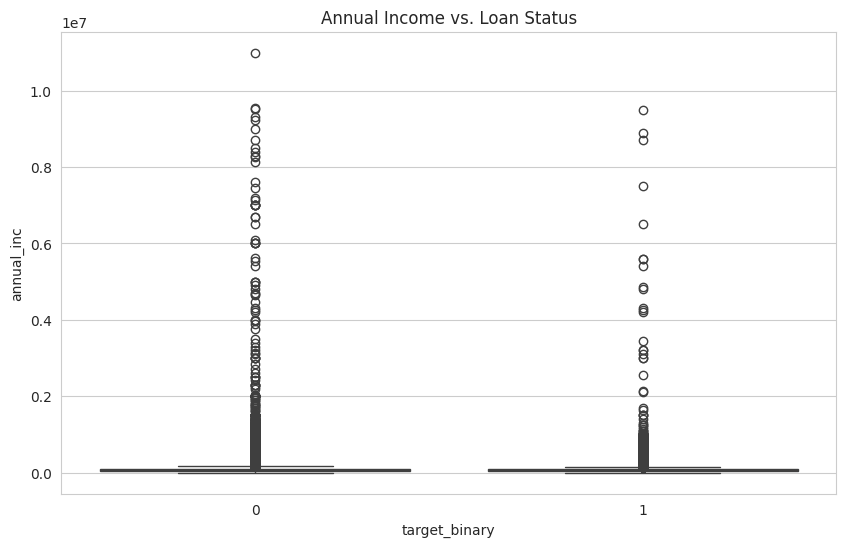

In [17]:

plt.figure(figsize=(10, 6))
sns.histplot(df['annual_inc'].dropna(), kde=True, bins=50)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target_binary', y='annual_inc', data=df)
plt.title('Annual Income vs. Loan Status')
plt.show()

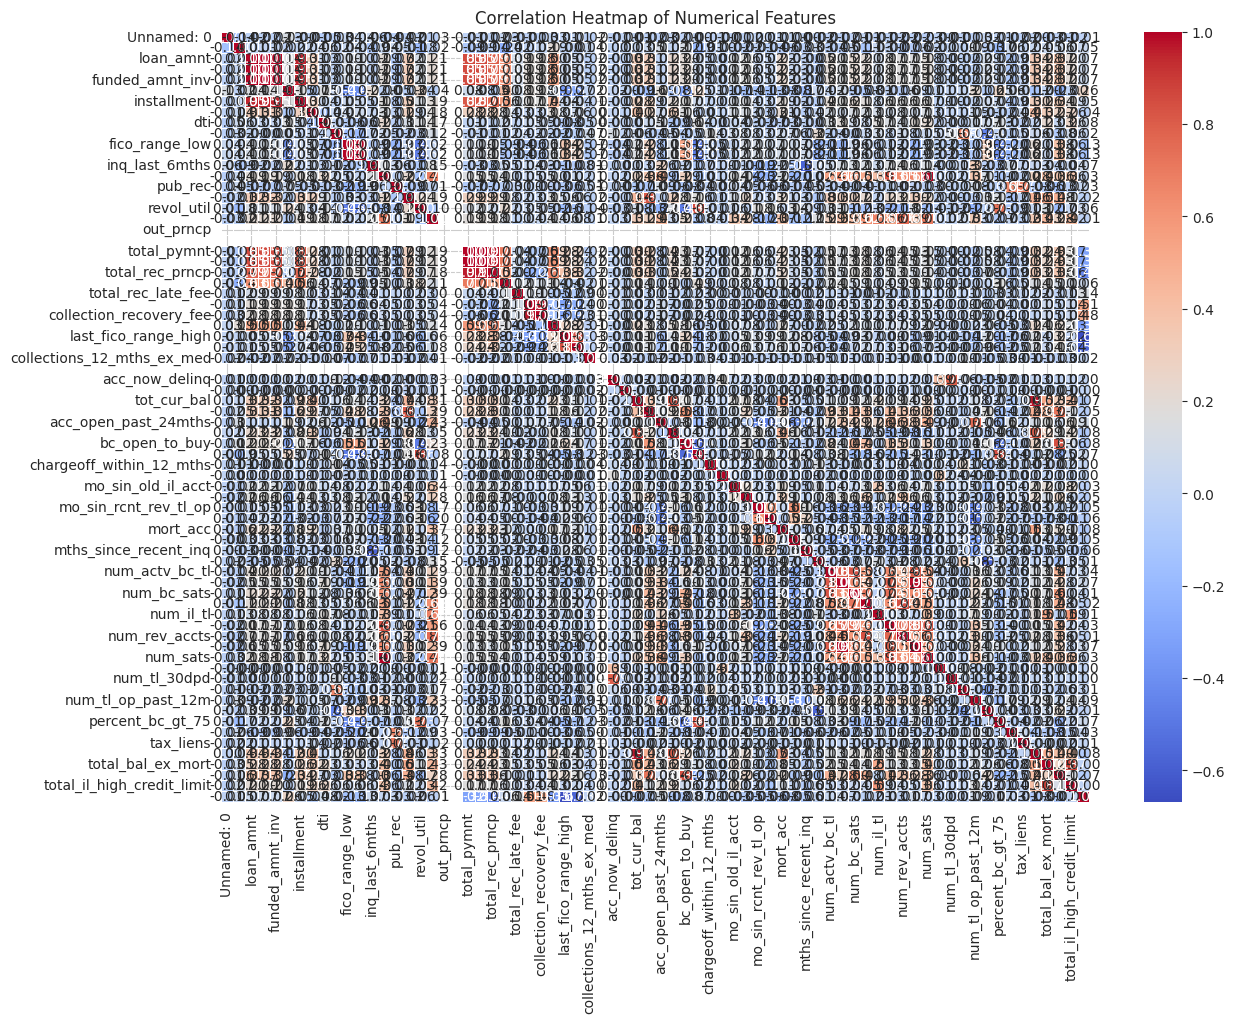

In [18]:
plt.figure(figsize=(14, 10))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Feature Selection 1: Removing
1) Meaningless/redundant and unneccessary features
2) the data leakge features using Domain Knowledge

In [21]:
# Drop unnecessary/redundant/meaningless features and data-leakage features from df

unnecessary_cols = [
    "Unnamed: 0", "id", "url", "emp_title", "title", "zip_code",
    "pymnt_plan", "funded_amnt", "funded_amnt_inv", "installment"
]

leakage_cols = [
    "out_prncp", "out_prncp_inv",
    "total_pymnt", "total_pymnt_inv",
    "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "collections_12_mths_ex_med",
    "last_pymnt_d", "last_pymnt_amnt",
    "last_credit_pull_d", "last_fico_range_high", "last_fico_range_low",
    "chargeoff_within_12_mths",
    "hardship_flag", "debt_settlement_flag",
    "settlement_status", "settlement_date", "settlement_amount",
    "settlement_percentage", "settlement_term", "debt_settlement_flag_date"
]

protected = {"target_binary"}

cols_to_drop = [c for c in (set(unnecessary_cols) | set(leakage_cols)) if c in df.columns and c not in protected]

df = df.drop(columns=cols_to_drop, errors="ignore")


In [22]:
df.shape

(1345310, 67)

In [23]:
# df.to_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_reduced_df.csv',index=False)

## Data Preprocessing 2: Filing Missing values and converting all the features into categorical features

In [24]:
import pandas as pd
-
sample_size = 100000
total_rows = len(df)
fraction_to_sample = sample_size / total_rows

print(f"Original df shape: {df.shape}")
print(f"Sampling {fraction_to_sample*100:.2f}% of the data...")

df2 = df.groupby('target_binary', group_keys=False).apply(
    lambda x: x.sample(frac=fraction_to_sample, random_state=42)
)

df2 = df2.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n--- Original Proportions (df) ---")
print(f"Shape: {df.shape}")
print(df['target_binary'].value_counts(normalize=True) * 100)

print("\n--- New Proportions (df2) ---")
print(f"Shape: {df2.shape}")
print(df2['target_binary'].value_counts(normalize=True) * 100)

Original df shape: (1345310, 67)
Sampling 7.43% of the data...


/tmp/ipython-input-4057845040.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df.groupby('target_binary', group_keys=False).apply(



--- Original Proportions (df) ---
Shape: (1345310, 67)
target_binary
0    80.037389
1    19.962611
Name: proportion, dtype: float64

--- New Proportions (df2) ---
Shape: (100000, 67)
target_binary
0    80.037
1    19.963
Name: proportion, dtype: float64


In [27]:
# df2.to_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_reduced_df_small.csv',index=False)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_reduced_df.csv')

In [3]:
remaining_missing_counts = df.isnull().sum()

columns_with_missing_data = remaining_missing_counts[remaining_missing_counts > 0]

columns_with_missing_data = columns_with_missing_data.sort_values(ascending=False)

if columns_with_missing_data.empty:
    print("Congratulations! No missing values remaining in your 67 features.")
else:
    print(f"Found {len(columns_with_missing_data)} columns with remaining missing values:")
    print(columns_with_missing_data)

Found 40 columns with remaining missing values:
mths_since_recent_inq         174071
num_tl_120dpd_2m              117401
mo_sin_old_il_acct            105575
emp_length                     78511
pct_tl_nvr_dlq                 67681
avg_cur_bal                    67549
num_rev_accts                  67528
mo_sin_old_rev_tl_op           67528
mo_sin_rcnt_rev_tl_op          67528
total_il_high_credit_limit     67527
num_tl_op_past_12m             67527
tot_hi_cred_lim                67527
tot_coll_amt                   67527
tot_cur_bal                    67527
total_rev_hi_lim               67527
num_op_rev_tl                  67527
num_il_tl                      67527
num_bc_tl                      67527
num_actv_rev_tl                67527
num_tl_90g_dpd_24m             67527
num_rev_tl_bal_gt_0            67527
mo_sin_rcnt_tl                 67527
num_accts_ever_120_pd          67527
num_actv_bc_tl                 67527
num_tl_30dpd                   67527
bc_util                    

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

def impute_lending_club_data(df):

    print("Starting imputation process...")
    print(f"Initial shape: {df.shape}")

    df_imputed = df.copy()


    never_had_features = {
        'mths_since_recent_inq': 999,
        'mths_since_recent_bc': 999,
        'mo_sin_old_il_acct': 999,
        'mo_sin_old_rev_tl_op': 999,
        'mo_sin_rcnt_rev_tl_op': 999,
        'mo_sin_rcnt_tl': 999,
    }

    print("\n1. Filling 'Never Had' temporal features...")
    for col, fill_value in never_had_features.items():
        if col in df_imputed.columns:
            before = df_imputed[col].isnull().sum()
            df_imputed[col].fillna(fill_value, inplace=True)
            print(f"   {col}: Filled {before} values with {fill_value}")


    zero_features = [
        'num_tl_120dpd_2m',
        'num_tl_30dpd',
        'num_tl_90g_dpd_24m',
        'num_accts_ever_120_pd',
        'acc_now_delinq',
        'delinq_amnt',
        'tax_liens',
        'pub_rec_bankruptcies',
        'tot_coll_amt',
    ]

    print("\n2. Filling 'Zero/None' count features...")
    for col in zero_features:
        if col in df_imputed.columns:
            before = df_imputed[col].isnull().sum()
            df_imputed[col].fillna(0, inplace=True)
            print(f"   {col}: Filled {before} values with 0")


    print("\n3. Filling categorical features...")

    if 'emp_length' in df_imputed.columns:
        before = df_imputed['emp_length'].isnull().sum()
        df_imputed['emp_length'].fillna('Unknown', inplace=True)
        print(f"   emp_length: Filled {before} values with 'Unknown'")


    utilization_features = [
        'revol_util',
        'bc_util',
        'percent_bc_gt_75'
    ]

    print("\n4. Filling utilization features with median...")
    for col in utilization_features:
        if col in df_imputed.columns:
            before = df_imputed[col].isnull().sum()
            median_val = df_imputed[col].median()
            df_imputed[col].fillna(median_val, inplace=True)
            print(f"   {col}: Filled {before} values with median={median_val:.2f}")


    balance_features = [
        'avg_cur_bal',
        'bc_open_to_buy',
        'tot_cur_bal',
        'total_rev_hi_lim',
        'tot_hi_cred_lim',
        'total_bal_ex_mort',
        'total_bc_limit',
        'total_il_high_credit_limit',
    ]

    print("\n5. Filling balance/amount features with median...")
    for col in balance_features:
        if col in df_imputed.columns:
            before = df_imputed[col].isnull().sum()
            median_val = df_imputed[col].median()
            df_imputed[col].fillna(median_val, inplace=True)
            print(f"   {col}: Filled {before} values with median={median_val:.2f}")


    count_features = [
        'num_actv_bc_tl',
        'num_actv_rev_tl',
        'num_bc_sats',
        'num_bc_tl',
        'num_il_tl',
        'num_op_rev_tl',
        'num_rev_accts',
        'num_rev_tl_bal_gt_0',
        'num_sats',
        'num_tl_op_past_12m',
        'acc_open_past_24mths',
        'mort_acc',
    ]

    print("\n6. Filling account count features with median...")
    for col in count_features:
        if col in df_imputed.columns:
            before = df_imputed[col].isnull().sum()
            median_val = df_imputed[col].median()
            df_imputed[col].fillna(median_val, inplace=True)
            print(f"   {col}: Filled {before} values with median={median_val:.2f}")


    if 'pct_tl_nvr_dlq' in df_imputed.columns:
        before = df_imputed['pct_tl_nvr_dlq'].isnull().sum()

        median_val = df_imputed['pct_tl_nvr_dlq'].median()
        df_imputed['pct_tl_nvr_dlq'].fillna(median_val, inplace=True)
        print(f"\n7. pct_tl_nvr_dlq: Filled {before} values with median={median_val:.2f}")


    if 'dti' in df_imputed.columns:
        before = df_imputed['dti'].isnull().sum()
        median_val = df_imputed['dti'].median()
        df_imputed['dti'].fillna(median_val, inplace=True)
        print(f"\n8. dti: Filled {before} values with median={median_val:.2f}")

    if 'inq_last_6mths' in df_imputed.columns:
        before = df_imputed['inq_last_6mths'].isnull().sum()
        df_imputed['inq_last_6mths'].fillna(0, inplace=True)
        print(f"   inq_last_6mths: Filled {before} values with 0")


    remaining_missing = df_imputed.isnull().sum()
    remaining_cols = remaining_missing[remaining_missing > 0]

    if len(remaining_cols) > 0:
        print(f"\n9. Handling {len(remaining_cols)} remaining columns with SimpleImputer...")

        for col in remaining_cols.index:
            if df_imputed[col].dtype in ['float64', 'int64']:
                median_val = df_imputed[col].median()
                df_imputed[col].fillna(median_val, inplace=True)
                print(f"   {col}: Filled with median")
            else:
                mode_val = df_imputed[col].mode()[0]
                df_imputed[col].fillna(mode_val, inplace=True)
                print(f"   {col}: Filled with mode")


    print("\n" + "="*70)
    print("IMPUTATION COMPLETE!")
    print("="*70)

    final_missing = df_imputed.isnull().sum().sum()
    print(f"\nFinal missing values: {final_missing}")
    print(f"Final shape: {df_imputed.shape}")

    if final_missing > 0:
        print("\nWARNING: Some missing values remain:")
        print(df_imputed.isnull().sum()[df_imputed.isnull().sum() > 0])
    else:
        print("\n✓ All missing values successfully imputed!")

    return df_imputed


def create_missing_indicators(df, important_features=None):

    if important_features is None:

        important_features = [
            'emp_length',
            'mths_since_recent_inq',
            'bc_util',
            'mo_sin_old_il_acct',
            'pct_tl_nvr_dlq'
        ]

    df_with_indicators = df.copy()

    for col in important_features:
        if col in df.columns:
            indicator_col = f'{col}_was_missing'
            df_with_indicators[indicator_col] = df[col].isnull().astype(int)

    return df_with_indicators



df_imputed = impute_lending_club_data(df)

print(f"Missing values remaining: {df_imputed.isnull().sum().sum()}")




if __name__ == "__main__":
    print("LendingClub Missing Value Imputation Script")
    print("=" * 70)
    print("\nThis script handles all 40 features with missing values using")
    print("domain-specific logic for credit data.")
    print("\nKey Strategy:")
    print("  • Temporal features (mths_since_*): 999 (never occurred)")
    print("  • Delinquency counts: 0 (no delinquencies)")
    print("  • Utilization rates: median")
    print("  • Balance amounts: median")
    print("  • Account counts: median")
    print("  • emp_length: 'Unknown' category")
    print("\nReady to use! Call: df_imputed = impute_lending_club_data(df)")

Starting imputation process...
Initial shape: (1345310, 67)

1. Filling 'Never Had' temporal features...
   mths_since_recent_inq: Filled 174071 values with 999
   mths_since_recent_bc: Filled 60221 values with 999
   mo_sin_old_il_acct: Filled 105575 values with 999
   mo_sin_old_rev_tl_op: Filled 67528 values with 999
   mo_sin_rcnt_rev_tl_op: Filled 67528 values with 999
   mo_sin_rcnt_tl: Filled 67527 values with 999

2. Filling 'Zero/None' count features...
   num_tl_120dpd_2m: Filled 117401 values with 0
   num_tl_30dpd: Filled 67527 values with 0
   num_tl_90g_dpd_24m: Filled 67527 values with 0
   num_accts_ever_120_pd: Filled 67527 values with 0
   acc_now_delinq: Filled 0 values with 0
   delinq_amnt: Filled 0 values with 0
   tax_liens: Filled 39 values with 0
   pub_rec_bankruptcies: Filled 697 values with 0
   tot_coll_amt: Filled 67527 values with 0

3. Filling categorical features...


/tmp/ipython-input-357102800.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(fill_value, inplace=True)
/tmp/ipython-input-357102800.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

   emp_length: Filled 78511 values with 'Unknown'

4. Filling utilization features with median...
   revol_util: Filled 857 values with median=52.20
   bc_util: Filled 61912 values with median=63.20
   percent_bc_gt_75: Filled 61555 values with median=42.90

5. Filling balance/amount features with median...
   avg_cur_bal: Filled 67549 values with median=7407.00
   bc_open_to_buy: Filled 61143 values with median=4700.00
   tot_cur_bal: Filled 67527 values with median=80231.00
   total_rev_hi_lim: Filled 67527 values with median=24100.00


/tmp/ipython-input-357102800.py:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_val, inplace=True)
/tmp/ipython-input-357102800.py:115: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

   tot_hi_cred_lim: Filled 67527 values with median=112373.00
   total_bal_ex_mort: Filled 47281 values with median=37296.00
   total_bc_limit: Filled 47281 values with median=15100.00
   total_il_high_credit_limit: Filled 67527 values with median=31681.00

6. Filling account count features with median...
   num_actv_bc_tl: Filled 67527 values with median=3.00
   num_actv_rev_tl: Filled 67527 values with median=5.00
   num_bc_sats: Filled 55841 values with median=4.00
   num_bc_tl: Filled 67527 values with median=7.00


/tmp/ipython-input-357102800.py:143: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_val, inplace=True)


   num_il_tl: Filled 67527 values with median=7.00
   num_op_rev_tl: Filled 67527 values with median=7.00
   num_rev_accts: Filled 67528 values with median=13.00
   num_rev_tl_bal_gt_0: Filled 67527 values with median=5.00
   num_sats: Filled 55841 values with median=11.00
   num_tl_op_past_12m: Filled 67527 values with median=2.00
   acc_open_past_24mths: Filled 47281 values with median=4.00
   mort_acc: Filled 47281 values with median=1.00


/tmp/ipython-input-357102800.py:155: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['pct_tl_nvr_dlq'].fillna(median_val, inplace=True)
/tmp/ipython-input-357102800.py:165: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace


7. pct_tl_nvr_dlq: Filled 67681 values with median=98.00

8. dti: Filled 374 values with median=17.61
   inq_last_6mths: Filled 1 values with 0

IMPUTATION COMPLETE!

Final missing values: 0
Final shape: (1345310, 67)

✓ All missing values successfully imputed!
Missing values remaining: 0
LendingClub Missing Value Imputation Script

This script handles all 40 features with missing values using
domain-specific logic for credit data.

Key Strategy:
  • Temporal features (mths_since_*): 999 (never occurred)
  • Delinquency counts: 0 (no delinquencies)
  • Utilization rates: median
  • Balance amounts: median
  • Account counts: median
  • emp_length: 'Unknown' category

Ready to use! Call: df_imputed = impute_lending_club_data(df)


In [5]:
# df_imputed.to_csv('/content/drive/MyDrive/SHODH_AI/cleaned_preprocessed_reduced_filledna_df.csv',index=False)

In [6]:
# Converting all the features to numerical features before applying SHAP
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def prepare_features_for_shap(df, target_col='target_binary'):


    print("="*70)
    print("FEATURE ENGINEERING & ENCODING PIPELINE")
    print("="*70)

    df_processed = df.copy()

    encoders_dict = {}

    print(f"\nInitial shape: {df_processed.shape}")
    print(f"Initial features: {df_processed.shape[1]}")


    print("\n" + "="*70)
    print("STEP 1: Removing Non-Predictive Columns")
    print("="*70)

    drop_cols = []

    if 'policy_code' in df_processed.columns:
        drop_cols.append('policy_code')
        print("  • policy_code: Always 1 (no variance)")

    if 'issue_d' in df_processed.columns:
        drop_cols.append('issue_d')
        print("  • issue_d: Will extract temporal features")


    if 'initial_list_status' in df_processed.columns:
        drop_cols.append('initial_list_status')
        print("  • initial_list_status: Low predictive value")

    if 'disbursement_method' in df_processed.columns:
        if df_processed['disbursement_method'].nunique() == 1:
            drop_cols.append('disbursement_method')
            print("  • disbursement_method: Only one unique value")

    if 'application_type' in df_processed.columns:
        if df_processed['application_type'].value_counts(normalize=True).iloc[0] > 0.95:
            drop_cols.append('application_type')
            print("  • application_type: >95% one category")

    df_processed = df_processed.drop(columns=drop_cols, errors='ignore')
    print(f"\nDropped {len(drop_cols)} non-predictive columns")


    print("\n" + "="*70)
    print("STEP 2: Feature Engineering")
    print("="*70)

    if 'loan_amnt' in df_processed.columns and 'annual_inc' in df_processed.columns:
        df_processed['loan_to_income_ratio'] = df_processed['loan_amnt'] / (df_processed['annual_inc'] + 1)
        print("  ✓ Created: loan_to_income_ratio")

    if 'fico_range_low' in df_processed.columns and 'fico_range_high' in df_processed.columns:
        df_processed['fico_score'] = (df_processed['fico_range_low'] + df_processed['fico_range_high']) / 2
        print("  ✓ Created: fico_score")
        df_processed = df_processed.drop(['fico_range_low', 'fico_range_high'], axis=1)

    if 'revol_util' in df_processed.columns:
        df_processed['high_revol_util'] = (df_processed['revol_util'] > 75).astype(int)
        print("  ✓ Created: high_revol_util (>75%)")

    if 'dti' in df_processed.columns:
        df_processed['high_dti'] = (df_processed['dti'] > 35).astype(int)
        print("  ✓ Created: high_dti (>35%)")

    if 'inq_last_6mths' in df_processed.columns:
        df_processed['multiple_inquiries'] = (df_processed['inq_last_6mths'] > 2).astype(int)
        print("  ✓ Created: multiple_inquiries (>2)")

    if 'earliest_cr_line' in df_processed.columns:
        try:
            df_processed['earliest_cr_line_date'] = pd.to_datetime(df_processed['earliest_cr_line'],
                                                                    format='%b-%Y', errors='coerce')
            reference_date = pd.to_datetime('2018-12-31')  # End of dataset
            df_processed['credit_history_years'] = (reference_date - df_processed['earliest_cr_line_date']).dt.days / 365.25
            df_processed = df_processed.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1)
            print("  ✓ Created: credit_history_years")
        except:
            print("  ⚠ Warning: Could not parse earliest_cr_line")

    if 'pub_rec' in df_processed.columns:
        df_processed['has_pub_rec'] = (df_processed['pub_rec'] > 0).astype(int)
        print("  ✓ Created: has_pub_rec")

    if 'delinq_2yrs' in df_processed.columns:
        df_processed['has_delinq'] = (df_processed['delinq_2yrs'] > 0).astype(int)
        print("  ✓ Created: has_delinq")

    if 'installment' in df_processed.columns and 'annual_inc' in df_processed.columns:
        df_processed['installment_to_income'] = df_processed['installment'] / (df_processed['annual_inc'] / 12 + 1)
        print("  ✓ Created: installment_to_income")

    if 'revol_bal' in df_processed.columns and 'total_rev_hi_lim' in df_processed.columns:
        df_processed['balance_to_limit_ratio'] = df_processed['revol_bal'] / (df_processed['total_rev_hi_lim'] + 1)
        print("  ✓ Created: balance_to_limit_ratio")

    print(f"\nCreated {10} new engineered features")


    print("\n" + "="*70)
    print("STEP 3: Encoding Categorical Variables")
    print("="*70)

    if 'term' in df_processed.columns:
        df_processed['term'] = df_processed['term'].str.extract('(\d+)').astype(int)
        print("  ✓ term: Extracted numeric value (36, 60)")

    if 'grade' in df_processed.columns:
        grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
        df_processed['grade_encoded'] = df_processed['grade'].map(grade_map)
        df_processed = df_processed.drop('grade', axis=1)
        print("  ✓ grade: Ordinal encoded (A=1 to G=7)")

    if 'sub_grade' in df_processed.columns:
        subgrade_map = {}
        for letter, num in zip('ABCDEFG', range(1, 8)):
            for subnum in range(1, 6):
                subgrade_map[f'{letter}{subnum}'] = num * 5 + subnum
        df_processed['sub_grade_encoded'] = df_processed['sub_grade'].map(subgrade_map)
        df_processed = df_processed.drop('sub_grade', axis=1)
        print("  ✓ sub_grade: Ordinal encoded (A1=6 to G5=40)")

    if 'emp_length' in df_processed.columns:
        emp_map = {
            '< 1 year': 0,
            '1 year': 1,
            '2 years': 2,
            '3 years': 3,
            '4 years': 4,
            '5 years': 5,
            '6 years': 6,
            '7 years': 7,
            '8 years': 8,
            '9 years': 9,
            '10+ years': 10,
            'Unknown': -1
        }
        df_processed['emp_length_years'] = df_processed['emp_length'].map(emp_map)
        df_processed['emp_length_years'].fillna(-1, inplace=True)
        df_processed = df_processed.drop('emp_length', axis=1)
        print("  ✓ emp_length: Ordinal encoded (0-10, -1=Unknown)")

    if 'home_ownership' in df_processed.columns:
        home_map = {'RENT': 1, 'OTHER': 2, 'MORTGAGE': 3, 'OWN': 4, 'NONE': 0, 'ANY': 2}
        df_processed['home_ownership_encoded'] = df_processed['home_ownership'].map(home_map)
        df_processed['home_ownership_encoded'].fillna(0, inplace=True)
        df_processed = df_processed.drop('home_ownership', axis=1)
        print("  ✓ home_ownership: Ordinal encoded")

    if 'verification_status' in df_processed.columns:
        verif_map = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
        df_processed['verification_encoded'] = df_processed['verification_status'].map(verif_map)
        df_processed['verification_encoded'].fillna(0, inplace=True)
        df_processed = df_processed.drop('verification_status', axis=1)
        print("  ✓ verification_status: Ordinal encoded")

    if 'purpose' in df_processed.columns:
        purpose_counts = df_processed['purpose'].value_counts(normalize=True)
        common_purposes = purpose_counts[purpose_counts > 0.01].index.tolist()

        df_processed['purpose_grouped'] = df_processed['purpose'].apply(
            lambda x: x if x in common_purposes else 'other'
        )

        purpose_dummies = pd.get_dummies(df_processed['purpose_grouped'], prefix='purpose', drop_first=True)
        df_processed = pd.concat([df_processed, purpose_dummies], axis=1)
        df_processed = df_processed.drop(['purpose', 'purpose_grouped'], axis=1)
        print(f"  ✓ purpose: One-hot encoded ({len(purpose_dummies.columns)} categories)")

    if 'addr_state' in df_processed.columns:
        if target_col in df_processed.columns:
            state_default_rate = df_processed.groupby('addr_state')[target_col].mean()
            df_processed['state_default_rate'] = df_processed['addr_state'].map(state_default_rate)
            print("  ✓ addr_state: Frequency encoded (default rate per state)")
        else:
            state_freq = df_processed['addr_state'].value_counts(normalize=True)
            df_processed['state_frequency'] = df_processed['addr_state'].map(state_freq)
            print("  ✓ addr_state: Frequency encoded")

        df_processed = df_processed.drop('addr_state', axis=1)

    print("\n" + "="*70)
    print("STEP 4: Label Encoding Remaining Categoricals")
    print("="*70)
    s
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

    if 'loan_status' in categorical_cols:
        categorical_cols.remove('loan_status')

    if len(categorical_cols) > 0:
        print(f"\nLabel encoding {len(categorical_cols)} remaining categorical columns:")
        for col in categorical_cols:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            encoders_dict[col] = le
            print(f"  ✓ {col}: {len(le.classes_)} unique values")
    else:
        print("  ✓ No remaining categorical columns")


    print("\n" + "="*70)
    print("STEP 5: Preparing Final Dataset")
    print("="*70)

    if target_col not in df_processed.columns:
        print(f"  ⚠ Warning: {target_col} not found, creating from loan_status")
        if 'loan_status' in df_processed.columns:
            df_processed[target_col] = (df_processed['loan_status'] == 'Charged Off').astype(int)

    if 'loan_status' in df_processed.columns:
        df_processed = df_processed.drop('loan_status', axis=1)

    X = df_processed.drop(target_col, axis=1)
    y = df_processed[target_col]

    print(f"\nFinal dataset:")
    print(f"  • Features (X): {X.shape}")
    print(f"  • Target (y): {y.shape}")
    print(f"  • Positive class (default): {y.sum()} ({y.mean()*100:.2f}%)")
    print(f"  • Negative class (paid): {(1-y).sum()} ({(1-y).mean()*100:.2f}%)")

    feature_names = X.columns.tolist()



    print("\n" + "="*70)
    print("STEP 6: Handling Infinite Values")
    print("="*70)

    X = X.replace([np.inf, -np.inf], np.nan)
    inf_counts = X.isnull().sum()
    if inf_counts.sum() > 0:
        print("  Found infinite values, replacing with column medians")
        for col in X.columns:
            if X[col].isnull().sum() > 0:
                X[col].fillna(X[col].median(), inplace=True)
    else:
        print("  ✓ No infinite values found")


    print("\n" + "="*70)
    print("STEP 7: Train-Test Split")
    print("="*70)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"  • Training set: {X_train.shape}")
    print(f"  • Test set: {X_test.shape}")
    print(f"  • Train positive rate: {y_train.mean()*100:.2f}%")
    print(f"  • Test positive rate: {y_test.mean()*100:.2f}%")


    print("\n" + "="*70)
    print("STEP 8: Feature Scaling")
    print("="*70)

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )

    print("  ✓ Applied StandardScaler to all features")


    print("\n" + "="*70)
    print("PIPELINE COMPLETE!")
    print("="*70)
    print(f"\n✓ All features are now numerical")
    print(f"✓ Total features: {len(feature_names)}")
    print(f"✓ Ready for SHAP analysis and model training")

    print("\nFeature categories:")
    print(f"  • Original numerical: ~35")
    print(f"  • Engineered features: ~10")
    print(f"  • Encoded categoricals: ~{len(feature_names) - 45}")

    return X_train_scaled, X_test_scaled, y_train, y_test, feature_names, scaler, encoders_dict



if __name__ == "__main__":
    print("\n" + "="*70)
    print("USAGE INSTRUCTIONS")
    print("="*70)
=
X_train, X_test, y_train, y_test, feature_names, scaler, encoders = prepare_features_for_shap(df_imputed, target_col='target_binary')

print("Feature engineering complete!")


<>:156: SyntaxWarning: invalid escape sequence '\d'
<>:156: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1334012640.py:156: SyntaxWarning: invalid escape sequence '\d'
  df_processed['term'] = df_processed['term'].str.extract('(\d+)').astype(int)



USAGE INSTRUCTIONS
FEATURE ENGINEERING & ENCODING PIPELINE

Initial shape: (1345310, 67)
Initial features: 67

STEP 1: Removing Non-Predictive Columns
  • policy_code: Always 1 (no variance)
  • issue_d: Will extract temporal features
  • initial_list_status: Low predictive value
  • application_type: >95% one category

Dropped 4 non-predictive columns

STEP 2: Feature Engineering
  ✓ Created: loan_to_income_ratio
  ✓ Created: fico_score
  ✓ Created: high_revol_util (>75%)
  ✓ Created: high_dti (>35%)
  ✓ Created: multiple_inquiries (>2)
  ✓ Created: credit_history_years
  ✓ Created: has_pub_rec
  ✓ Created: has_delinq
  ✓ Created: balance_to_limit_ratio

Created 10 new engineered features

STEP 3: Encoding Categorical Variables
  ✓ term: Extracted numeric value (36, 60)
  ✓ grade: Ordinal encoded (A=1 to G=7)
  ✓ sub_grade: Ordinal encoded (A1=6 to G5=40)
  ✓ emp_length: Ordinal encoded (0-10, -1=Unknown)
  ✓ home_ownership: Ordinal encoded
  ✓ verification_status: Ordinal encoded
  

SHAP FEATURE SELECTION PIPELINE - LENDINGCLUB LOAN DATA

STEP 1: Data Preparation
Training set: (1076248, 73)
Test set: (269062, 73)
Total features: 73
Target distribution (train): {0: 861401, 1: 214847}
Default rate (train): 19.96%

STEP 2: Training LightGBM Model
Training LightGBM with balanced class weights...
✓ Model trained successfully
  Training accuracy: 0.6581
  Test accuracy: 0.6553

STEP 3: Computing SHAP Values
Using 2000 samples for SHAP calculation (faster & stable)...
Sample size: 2000
Sample default rate: 50.00%

Creating SHAP TreeExplainer...
Computing SHAP values... (this may take 1-3 minutes)
✓ SHAP values computed successfully
  Shape: (2000, 73)

STEP 4: Computing Feature Importance Rankings

📊 Top 20 Most Important Features:
--------------------------------------------------------------------------------
Rank  Feature                                 SHAP Importance     Cumulative %   
--------------------------------------------------------------------------------

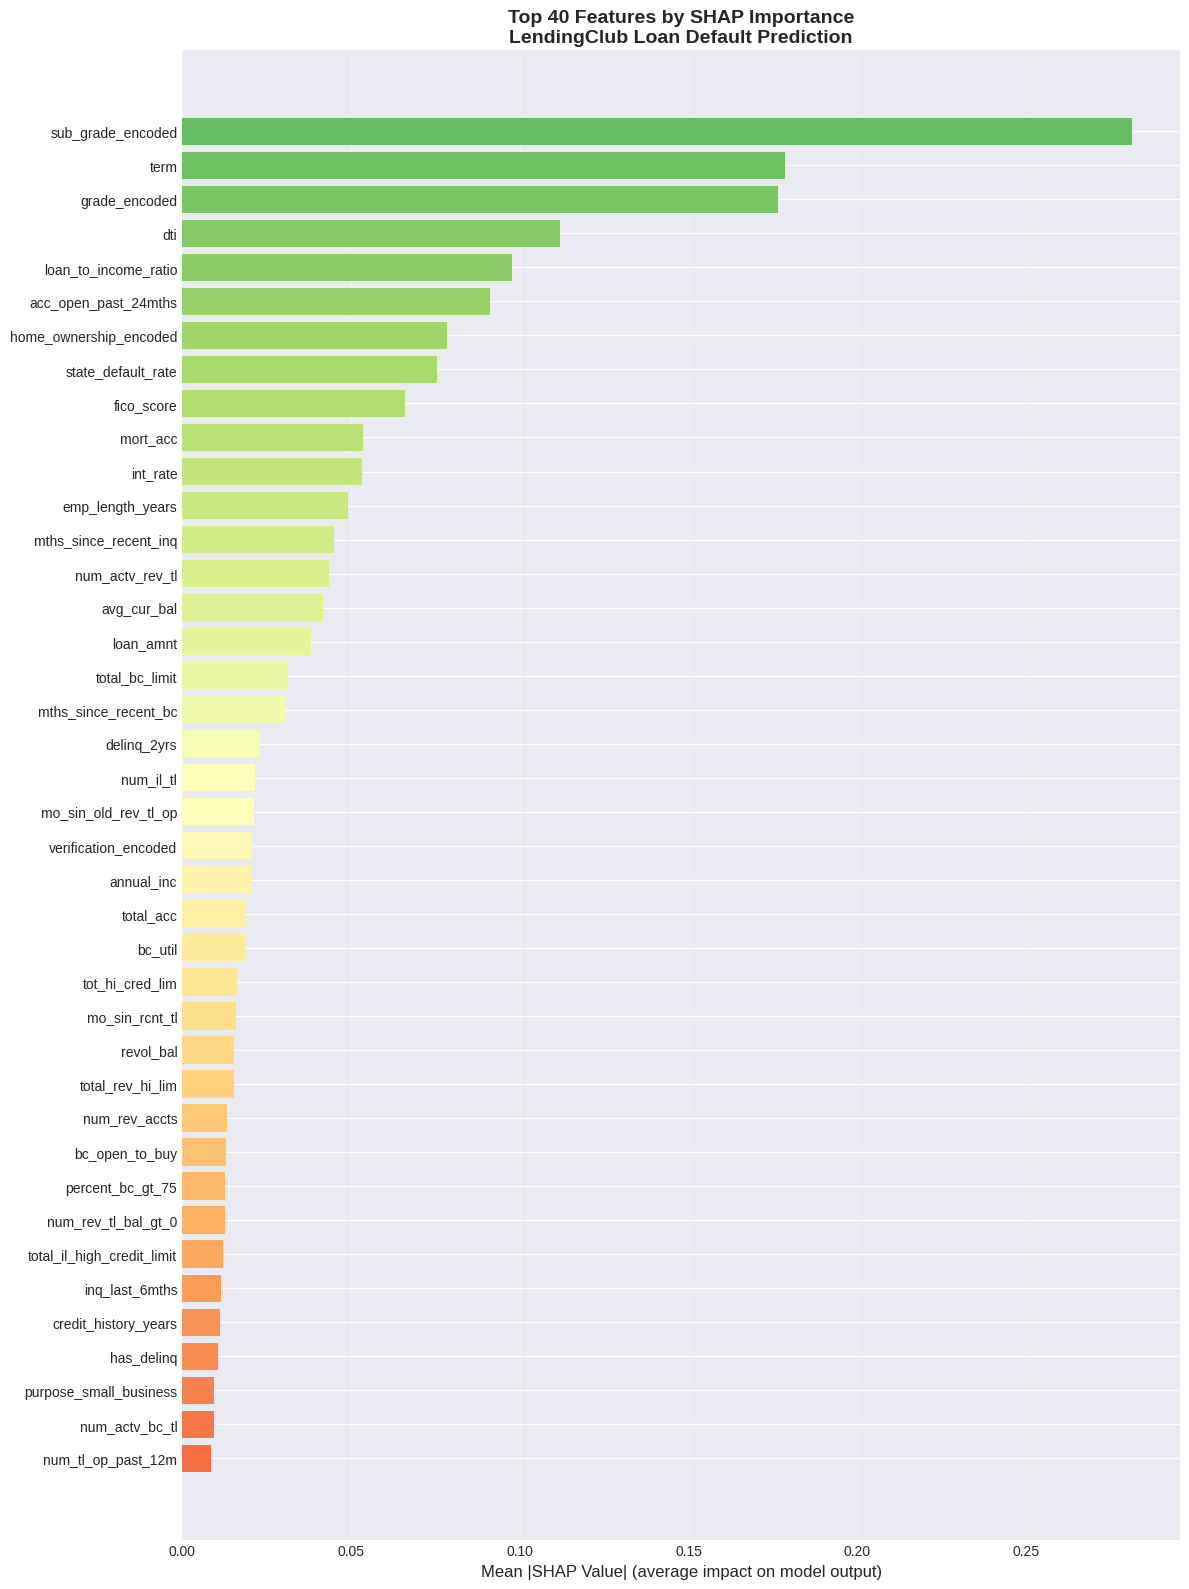


Creating SHAP summary plot (beeswarm)...
✓ Saved: shap_summary_beeswarm.png


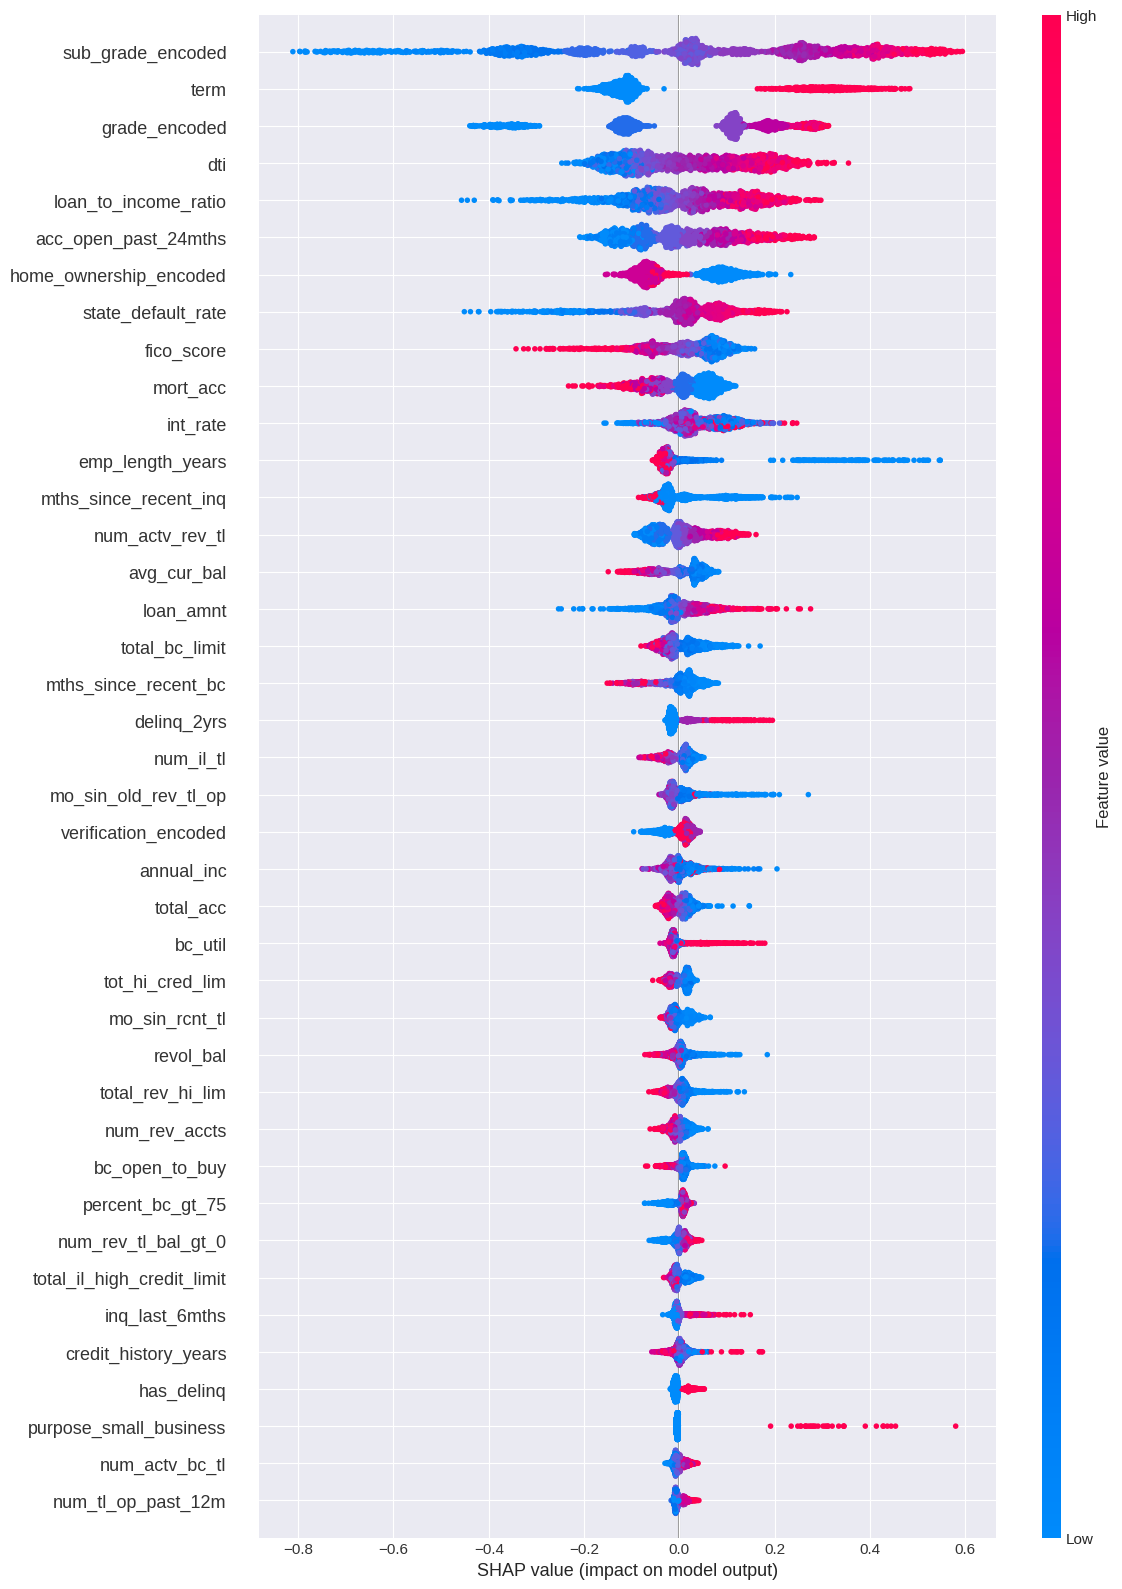


Creating SHAP summary bar plot...
✓ Saved: shap_summary_bar.png


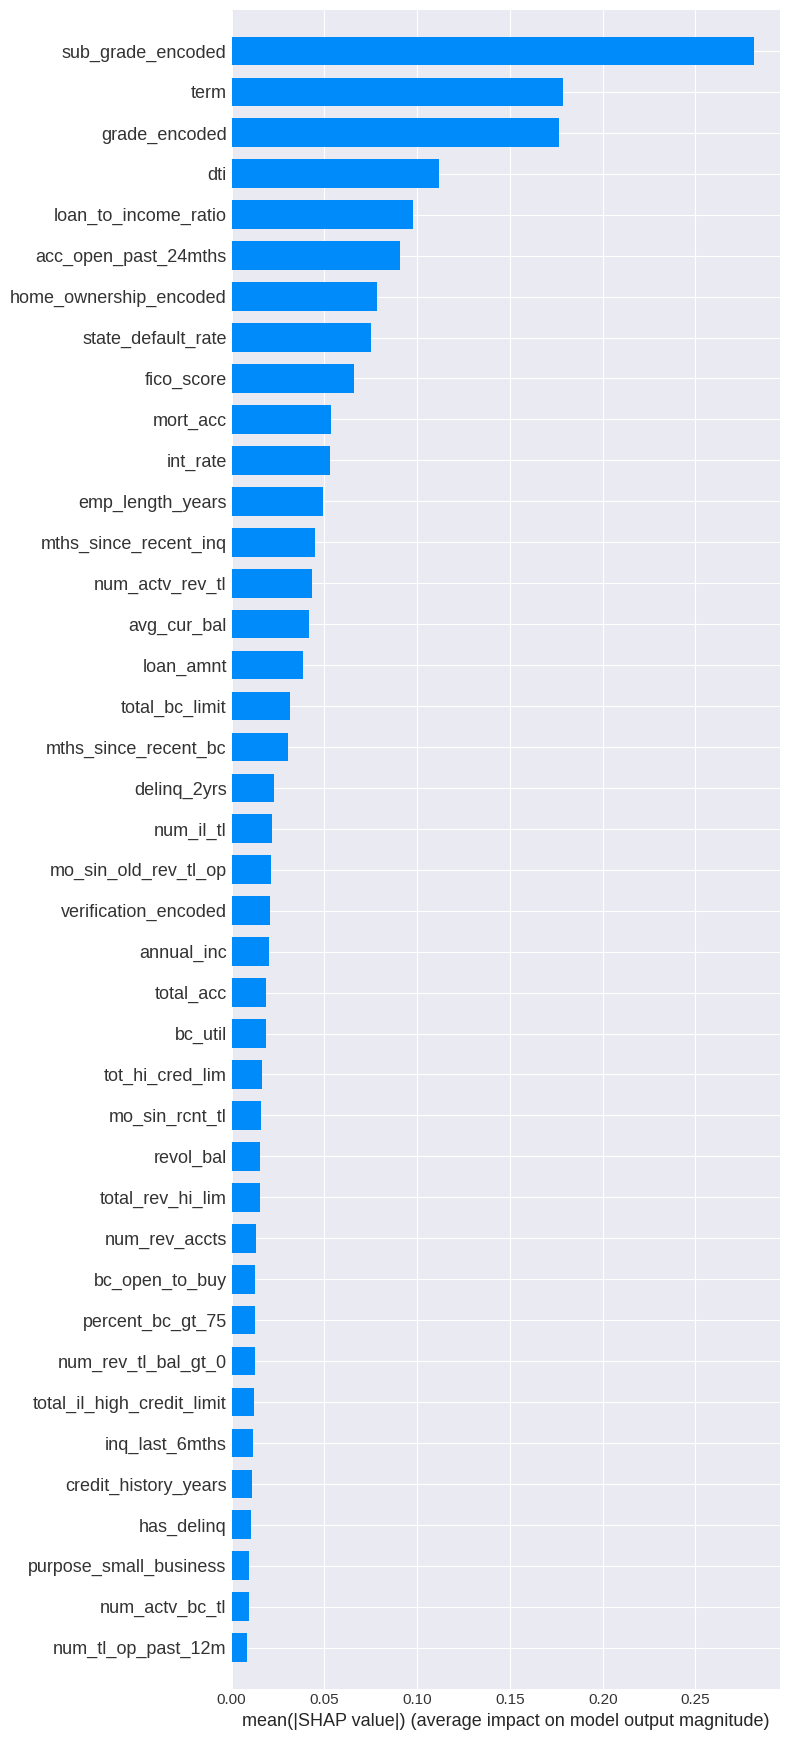


Creating cumulative importance plot...
✓ Saved: cumulative_importance.png


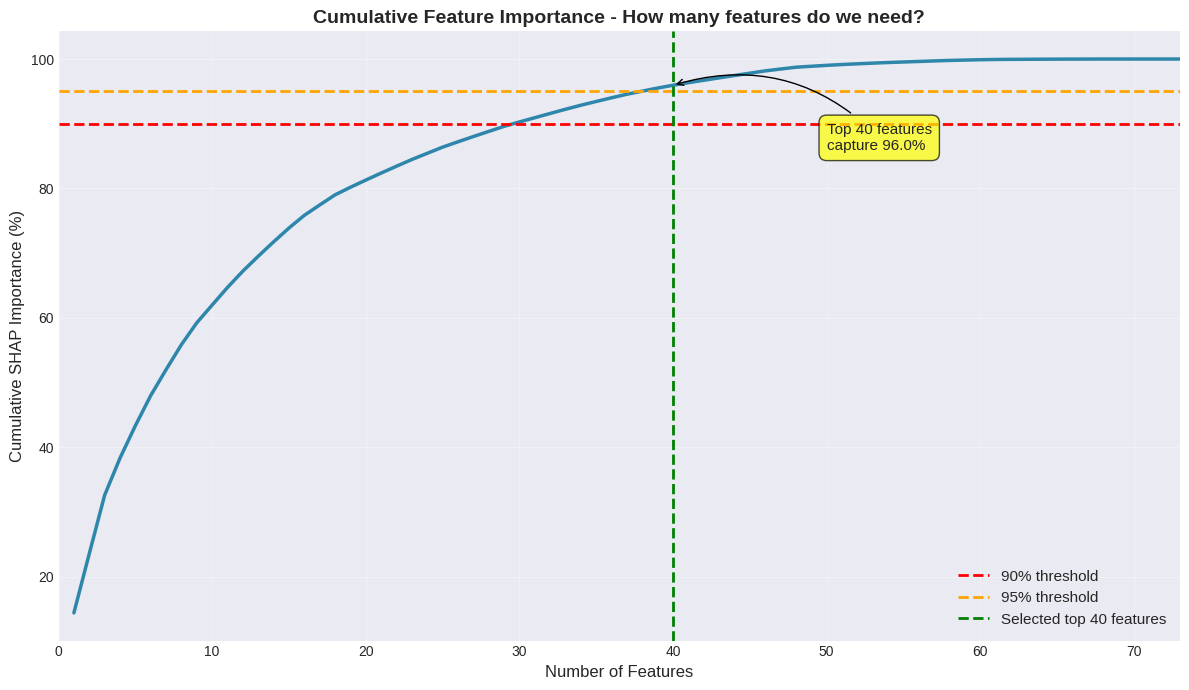


Creating SHAP vs LightGBM importance comparison...
✓ Saved: shap_vs_lgb_importance.png


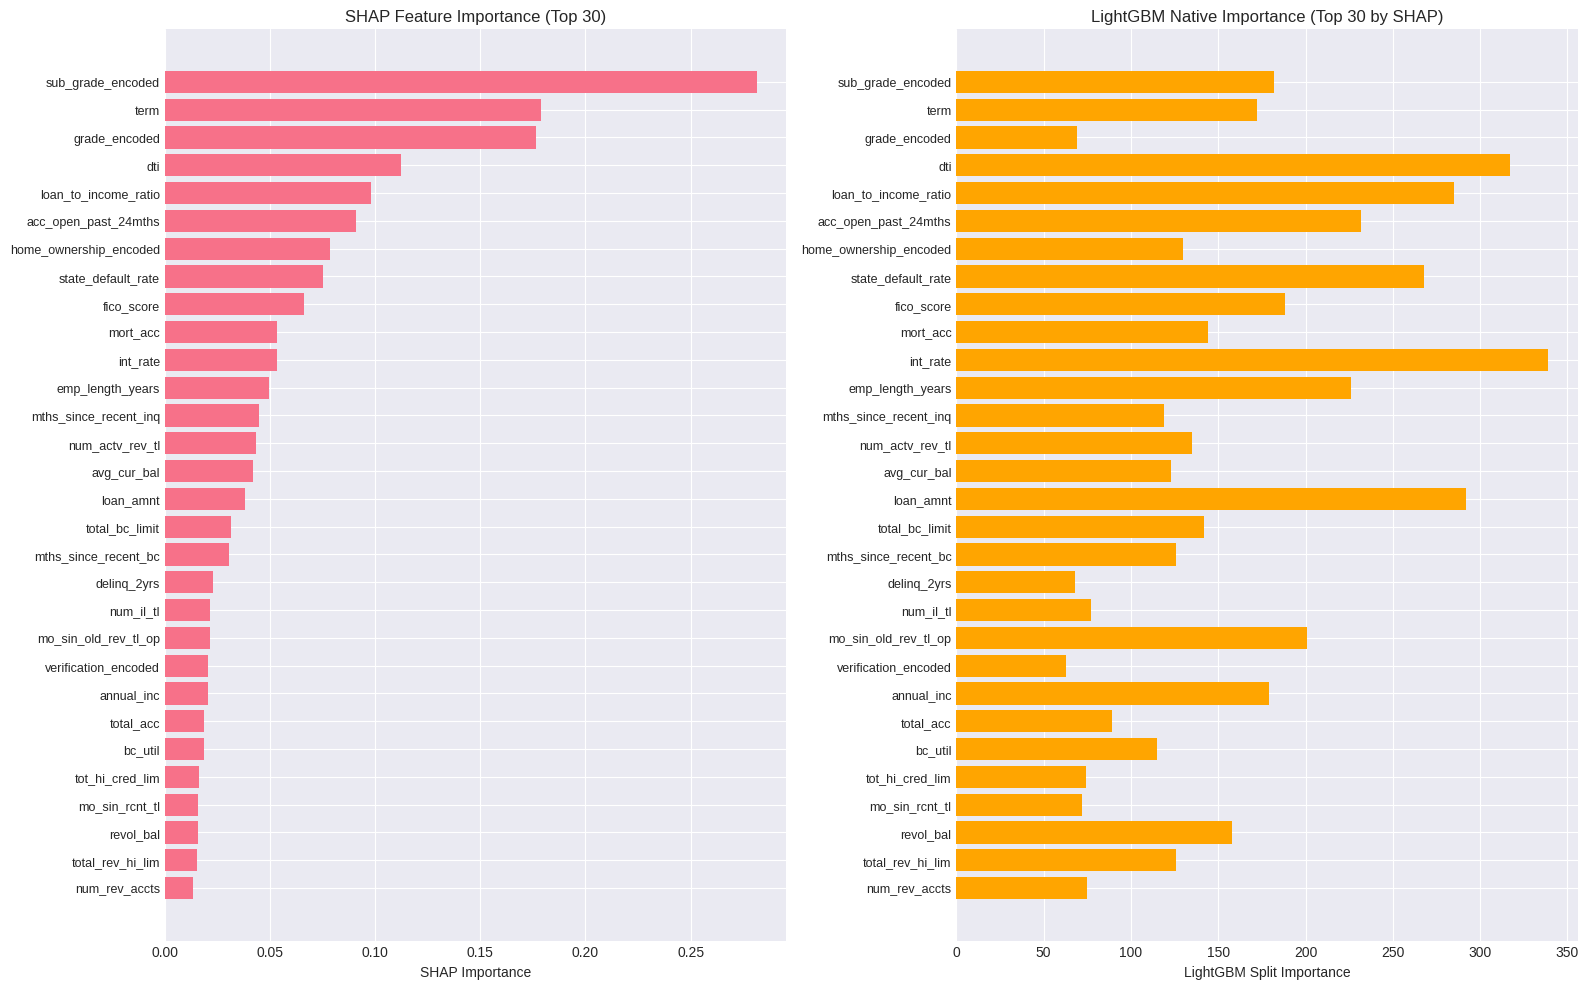


STEP 7: Creating df_SHAP Dataset

✓ df_SHAP created successfully!
  Shape: (1345310, 42)
  Features: 40 + target_binary + dataset
  Rows: 1,345,310
    - Train: 1,076,248
    - Test: 269,062

STEP 8: Saving Results
✓ Saved: df_SHAP_top40.csv
✓ Saved: feature_importance_rankings.csv
✓ Saved: selected_features_top40.txt

🎉 SHAP FEATURE SELECTION COMPLETE!

📊 SUMMARY:
  • Original features: 73
  • Selected features: 40
  • Reduction ratio: 45.2%
  • Captured importance: 95.95%
  
📁 OUTPUT FILES:
  • df_SHAP_top40.csv - Main dataset with top 40 features
  • feature_importance_rankings.csv - Full feature ranking table
  • selected_features_top40.txt - List of selected features
  • shap_top40_importance.png - Feature importance bar chart
  • shap_summary_beeswarm.png - SHAP beeswarm plot
  • shap_summary_bar.png - SHAP summary bar plot
  • cumulative_importance.png - Cumulative importance curve
  • shap_vs_lgb_importance.png - SHAP vs LightGBM comparison

✅ Ready for deep learning model tra

In [7]:
# Applying SHAP to extract top 40 features:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import shap
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def shap_feature_selection_pipeline(X_train, X_test, y_train, y_test,
                                    feature_names, top_k=40):


    print("="*80)
    print("SHAP FEATURE SELECTION PIPELINE - LENDINGCLUB LOAN DATA")
    print("="*80)


    print("\n" + "="*80)
    print("STEP 1: Data Preparation")
    print("="*80)

    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train, columns=feature_names)
        X_test = pd.DataFrame(X_test, columns=feature_names)

    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Total features: {len(feature_names)}")
    print(f"Target distribution (train): {y_train.value_counts().to_dict()}")
    print(f"Default rate (train): {y_train.mean()*100:.2f}%")


    print("\n" + "="*80)
    print("STEP 2: Training LightGBM Model")
    print("="*80)


    model = lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.05,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1,
        class_weight='balanced'
    )

    print("Training LightGBM with balanced class weights...")
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
    )

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"✓ Model trained successfully")
    print(f"  Training accuracy: {train_score:.4f}")
    print(f"  Test accuracy: {test_score:.4f}")


    print("\n" + "="*80)
    print("STEP 3: Computing SHAP Values")
    print("="*80)

    sample_size = min(2000, X_train.shape[0])
    print(f"Using {sample_size} samples for SHAP calculation (faster & stable)...")

    sample_indices = y_train.groupby(y_train, group_keys=False).apply(
        lambda x: x.sample(n=min(len(x), sample_size//2), random_state=42)
    ).index
    X_sample = X_train.loc[sample_indices]
    y_sample = y_train.loc[sample_indices]

    print(f"Sample size: {len(X_sample)}")
    print(f"Sample default rate: {y_sample.mean()*100:.2f}%")

    print("\nCreating SHAP TreeExplainer...")
    explainer = shap.TreeExplainer(model)

    print("Computing SHAP values... (this may take 1-3 minutes)")
    shap_values = explainer.shap_values(X_sample)

    if isinstance(shap_values, list):
        shap_values_pos = shap_values[1]
    else:
        shap_values_pos = shap_values

    print("✓ SHAP values computed successfully")
    print(f"  Shape: {shap_values_pos.shape}")


    print("\n" + "="*80)
    print("STEP 4: Computing Feature Importance Rankings")
    print("="*80)

    shap_importance = np.abs(shap_values_pos).mean(axis=0)

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'shap_importance': shap_importance,
        'lgb_importance': model.feature_importances_
    }).sort_values('shap_importance', ascending=False).reset_index(drop=True)

    feature_importance_df['rank'] = range(1, len(feature_importance_df) + 1)

    feature_importance_df['shap_importance_norm'] = (
        feature_importance_df['shap_importance'] / feature_importance_df['shap_importance'].sum()
    )

    feature_importance_df['cumulative_importance'] = (
        feature_importance_df['shap_importance_norm'].cumsum()
    )

    print("\n📊 Top 20 Most Important Features:")
    print("-" * 80)
    print(f"{'Rank':<6}{'Feature':<40}{'SHAP Importance':<20}{'Cumulative %':<15}")
    print("-" * 80)

    for idx, row in feature_importance_df.head(20).iterrows():
        print(f"{row['rank']:<6}{row['feature']:<40}{row['shap_importance']:.6f}        "
              f"{row['cumulative_importance']*100:>6.2f}%")


    print("\n" + "="*80)
    print(f"STEP 5: Selecting Top {top_k} Features")
    print("="*80)

    selected_features = feature_importance_df.head(top_k)['feature'].tolist()
    cumulative_at_k = feature_importance_df.iloc[top_k-1]['cumulative_importance']

    print(f"\n✓ Selected {len(selected_features)} features")
    print(f"✓ These features capture {cumulative_at_k*100:.2f}% of total SHAP importance")
    print(f"✓ Feature reduction: {len(feature_names)} → {top_k} ({top_k/len(feature_names)*100:.1f}%)")

    print(f"\n📋 Selected Top {top_k} Features:")
    print("-" * 80)
    for i, feat in enumerate(selected_features, 1):
        if i <= 10 or i > top_k - 5:
            imp = feature_importance_df[feature_importance_df['feature'] == feat]['shap_importance'].values[0]
            print(f"  {i:2d}. {feat:<45s} (importance: {imp:.6f})")
        elif i == 11:
            print(f"  ... (showing top 10 and bottom 5)")


    print("\n" + "="*80)
    print("STEP 6: Creating SHAP Visualizations")
    print("="*80)

    fig, ax = plt.subplots(figsize=(12, 16))

    top_features_df = feature_importance_df.head(top_k)
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_features_df)))

    ax.barh(range(len(top_features_df)), top_features_df['shap_importance'], color=colors)
    ax.set_yticks(range(len(top_features_df)))
    ax.set_yticklabels(top_features_df['feature'], fontsize=10)
    ax.set_xlabel('Mean |SHAP Value| (average impact on model output)', fontsize=12)
    ax.set_title(f'Top {top_k} Features by SHAP Importance\nLendingClub Loan Default Prediction',
                 fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig('shap_top40_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: shap_top40_importance.png")
    plt.show()

    print("\nCreating SHAP summary plot (beeswarm)...")
    plt.figure(figsize=(12, 16))
    shap.summary_plot(
        shap_values_pos,
        X_sample,
        max_display=top_k,
        show=False,
        plot_size=(12, 16)
    )
    plt.tight_layout()
    plt.savefig('shap_summary_beeswarm.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: shap_summary_beeswarm.png")
    plt.show()

    print("\nCreating SHAP summary bar plot...")
    plt.figure(figsize=(12, 16))
    shap.summary_plot(
        shap_values_pos,
        X_sample,
        plot_type="bar",
        max_display=top_k,
        show=False
    )
    plt.tight_layout()
    plt.savefig('shap_summary_bar.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: shap_summary_bar.png")
    plt.show()

    print("\nCreating cumulative importance plot...")
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.plot(range(1, len(feature_importance_df)+1),
            feature_importance_df['cumulative_importance']*100,
            linewidth=2.5, color='#2E86AB')
    ax.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% threshold')
    ax.axhline(y=95, color='orange', linestyle='--', linewidth=2, label='95% threshold')
    ax.axvline(x=top_k, color='green', linestyle='--', linewidth=2,
               label=f'Selected top {top_k} features')

    =ax.annotate(f'Top {top_k} features\ncapture {cumulative_at_k*100:.1f}%',
                xy=(top_k, cumulative_at_k*100),
                xytext=(top_k + 10, cumulative_at_k*100 - 10),
                fontsize=11,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))

    ax.set_xlabel('Number of Features', fontsize=12)
    ax.set_ylabel('Cumulative SHAP Importance (%)', fontsize=12)
    ax.set_title('Cumulative Feature Importance - How many features do we need?',
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='lower right')
    ax.grid(alpha=0.3)
    ax.set_xlim(0, min(100, len(feature_importance_df)))

    plt.tight_layout()
    plt.savefig('cumulative_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: cumulative_importance.png")
    plt.show()

    print("\nCreating SHAP vs LightGBM importance comparison...")
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))

    top_30 = feature_importance_df.head(30)

    =axes[0].barh(range(len(top_30)), top_30['shap_importance'])
    axes[0].set_yticks(range(len(top_30)))
    axes[0].set_yticklabels(top_30['feature'], fontsize=9)
    axes[0].set_xlabel('SHAP Importance')
    axes[0].set_title('SHAP Feature Importance (Top 30)')
    axes[0].invert_yaxis()

    axes[1].barh(range(len(top_30)), top_30['lgb_importance'], color='orange')
    axes[1].set_yticks(range(len(top_30)))
    axes[1].set_yticklabels(top_30['feature'], fontsize=9)
    axes[1].set_xlabel('LightGBM Split Importance')
    axes[1].set_title('LightGBM Native Importance (Top 30 by SHAP)')
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('shap_vs_lgb_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: shap_vs_lgb_importance.png")
    plt.show()


    print("\n" + "="*80)
    print("STEP 7: Creating df_SHAP Dataset")
    print("="*80)

    X_train_selected = X_train[selected_features].copy()
    X_test_selected = X_test[selected_features].copy()

    X_train_selected['target_binary'] = y_train.values
    X_test_selected['target_binary'] = y_test.values

    X_train_selected['dataset'] = 'train'
    X_test_selected['dataset'] = 'test'

    df_SHAP = pd.concat([X_train_selected, X_test_selected], axis=0, ignore_index=True)

    print(f"\n✓ df_SHAP created successfully!")
    print(f"  Shape: {df_SHAP.shape}")
    print(f"  Features: {top_k} + target_binary + dataset")
    print(f"  Rows: {len(df_SHAP):,}")
    print(f"    - Train: {(df_SHAP['dataset']=='train').sum():,}")
    print(f"    - Test: {(df_SHAP['dataset']=='test').sum():,}")


    print("\n" + "="*80)
    print("STEP 8: Saving Results")
    print("="*80)

    df_SHAP.to_csv('df_SHAP_top40.csv', index=False)
    print("✓ Saved: df_SHAP_top40.csv")

    feature_importance_df.to_csv('feature_importance_rankings.csv', index=False)
    print("✓ Saved: feature_importance_rankings.csv")

    with open('selected_features_top40.txt', 'w') as f:
        f.write(f"Top {top_k} Selected Features by SHAP Importance\n")
        f.write("="*60 + "\n\n")
        for i, feat in enumerate(selected_features, 1):
            imp = feature_importance_df[feature_importance_df['feature'] == feat]['shap_importance'].values[0]
            f.write(f"{i:2d}. {feat:<45s} {imp:.6f}\n")
    print("✓ Saved: selected_features_top40.txt")


    print("\n" + "="*80)
    print("🎉 SHAP FEATURE SELECTION COMPLETE!")
    print("="*80)

    print(f"""
 SUMMARY:
  • Original features: {len(feature_names)}
  • Selected features: {top_k}
  • Reduction ratio: {(1 - top_k/len(feature_names))*100:.1f}%
  • Captured importance: {cumulative_at_k*100:.2f}%

 OUTPUT FILES:
  • df_SHAP_top40.csv - Main dataset with top 40 features
  • feature_importance_rankings.csv - Full feature ranking table
  • selected_features_top40.txt - List of selected features
  • shap_top40_importance.png - Feature importance bar chart
  • shap_summary_beeswarm.png - SHAP beeswarm plot
  • shap_summary_bar.png - SHAP summary bar plot
  • cumulative_importance.png - Cumulative importance curve
  • shap_vs_lgb_importance.png - SHAP vs LightGBM comparison

 Ready for deep learning model training!
 Ready for reinforcement learning environment!
    """)

    return df_SHAP, selected_features, shap_values_pos, model, feature_importance_df



if __name__ == "__main__":



    df_SHAP, selected_features, shap_values, model, importance_df = shap_feature_selection_pipeline(
            X_train, X_test, y_train, y_test,
            feature_names, top_k=40
        )


    print(f"df_SHAP shape: {df_SHAP.shape}")
    print(f"Selected features: {len(selected_features)}")

    df_SHAP_train = df_SHAP[df_SHAP['dataset'] == 'train'].drop('dataset', axis=1)
    df_SHAP_test = df_SHAP[df_SHAP['dataset'] == 'test'].drop('dataset', axis=1)


In [8]:
df_SHAP_train.shape

(1076248, 41)

In [9]:
df_SHAP_train

,sub_grade_encoded,term,grade_encoded,dti,loan_to_income_ratio,acc_open_past_24mths,home_ownership_encoded,state_default_rate,fico_score,mort_acc,...,percent_bc_gt_75,num_rev_tl_bal_gt_0,total_il_high_credit_limit,inq_last_6mths,credit_history_years,has_delinq,purpose_small_business,num_actv_bc_tl,num_tl_op_past_12m,target_binary
0,-0.572803,1.773359,-0.576179,-0.931554,-0.014411,-0.213210,-1.185558,-0.175013,-0.508072,-0.836743,...,0.615249,0.459053,2.515945,-0.698334,-0.141278,-0.488716,-0.107949,-0.277925,-0.650524,1
1,-0.727776,-0.563901,-0.576179,0.204224,-0.013539,0.743918,-1.185558,-2.679042,2.158871,-0.836743,...,-1.280337,-0.816858,-0.178877,-0.698334,-0.918975,-0.488716,-0.107949,-1.189195,0.462228,0
2,-1.502640,-0.563901,-1.348037,-0.522074,-0.014587,0.743918,1.525150,-1.286198,-0.508072,0.179411,...,0.748821,0.140076,0.643959,0.367422,-0.722391,-0.488716,-0.107949,0.633344,-0.650524,0
3,0.047088,-0.563901,0.195680,0.390431,-0.014124,-1.170338,-1.185558,0.752164,0.590081,-0.836743,...,-0.333965,-1.135836,-0.271032,-0.698334,-1.357510,-0.488716,-0.107949,-0.733560,-1.206899,1
4,0.047088,-0.563901,0.195680,0.441616,-0.014592,-0.213210,0.621580,-1.444227,-0.821830,-0.328666,...,-0.061137,-0.178902,-0.235639,1.433178,-0.272695,-0.488716,-0.107949,-0.277925,-0.094148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076243,-0.727776,1.773359,-0.576179,0.743432,-0.014297,-0.851295,-1.185558,0.576386,2.629508,-0.836743,...,-0.711945,-0.497880,1.641962,-0.698334,1.074954,-0.488716,-0.107949,0.177710,-0.094148,0
1076244,0.357034,-0.563901,0.195680,0.564284,-0.014241,-0.213210,-1.185558,-0.165326,-0.978709,-0.836743,...,0.615249,0.140076,0.128221,0.367422,-1.138603,-0.488716,-0.107949,-0.277925,1.018603,0
1076245,-0.107885,-0.563901,0.195680,1.265872,-0.014345,0.424875,-1.185558,1.601447,-0.351193,-0.836743,...,0.851131,-0.816858,2.587585,-0.698334,-0.414912,2.046176,-0.107949,-0.733560,-1.206899,0
1076246,1.441843,1.773359,1.739397,1.514737,-0.014126,1.062961,-1.185558,2.051394,-0.978709,-0.836743,...,1.277425,2.691899,-0.377923,-0.698334,-1.061553,-0.488716,-0.107949,2.455884,1.018603,1


In [10]:
df_SHAP_test

,sub_grade_encoded,term,grade_encoded,dti,loan_to_income_ratio,acc_open_past_24mths,home_ownership_encoded,state_default_rate,fico_score,mort_acc,...,percent_bc_gt_75,num_rev_tl_bal_gt_0,total_il_high_credit_limit,inq_last_6mths,credit_history_years,has_delinq,purpose_small_business,num_actv_bc_tl,num_tl_op_past_12m,target_binary
1076248,-1.037722,-0.563901,-1.348037,0.250114,-0.014113,-0.213210,1.525150,-0.069652,-0.037435,0.179411,...,0.140642,1.415987,-0.152580,-0.698334,-0.414912,2.046176,-0.107949,1.544614,1.018603,0
1076249,-0.572803,-0.563901,-0.576179,0.774319,-0.013503,1.062961,0.621580,-2.091860,-0.351193,-0.836743,...,-1.280337,1.415987,0.301279,-0.698334,-0.842646,-0.488716,-0.107949,-1.189195,0.462228,0
1076250,-0.727776,-0.563901,-0.576179,-0.981857,-0.014608,-0.532253,-1.185558,0.576386,-0.664951,-0.836743,...,0.140642,-0.497880,0.150751,-0.698334,-1.368671,-0.488716,-0.107949,-0.733560,-0.094148,0
1076251,0.202061,1.773359,0.195680,-0.178781,-0.014315,-0.532253,0.621580,-2.091860,-0.037435,0.179411,...,0.993229,0.140076,0.597313,-0.698334,-0.152080,-0.488716,-0.107949,0.633344,-0.094148,0
1076252,-0.107885,-0.563901,0.195680,-0.169956,-0.013728,-0.851295,-1.185558,0.752164,-0.508072,-0.836743,...,0.993229,0.140076,-0.379463,-0.698334,-0.930137,-0.488716,-0.107949,0.633344,-1.206899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,-1.037722,-0.563901,-1.348037,-0.416174,-0.014581,-0.213210,0.621580,-1.041906,0.590081,-0.328666,...,-0.061137,-0.178902,-0.235639,0.367422,1.173966,-0.488716,-0.107949,-0.277925,-0.094148,0
1345306,-0.572803,-0.563901,-0.576179,-0.531781,-0.014366,-1.170338,0.621580,1.747250,-0.821830,0.179411,...,0.424838,0.140076,-0.321871,-0.698334,-0.612577,-0.488716,-0.107949,0.633344,-1.206899,0
1345307,0.047088,-0.563901,0.195680,-0.834479,-0.014256,0.424875,0.621580,0.412733,-0.664951,0.179411,...,0.140642,0.140076,-0.986172,0.367422,-0.996025,-0.488716,-0.107949,1.088979,0.462228,0
1345308,0.512006,1.773359,0.195680,-0.414409,-0.013776,-1.489381,-1.185558,-2.774001,-0.978709,-0.836743,...,1.561621,-0.816858,-0.808873,-0.698334,-0.218328,-0.488716,-0.107949,-0.733560,-1.206899,0


In [11]:
# df_SHAP_train.to_csv('/content/drive/MyDrive/SHODH_AI/df_SHAP_train.csv',index=False)
# df_SHAP_test.to_csv('/content/drive/MyDrive/SHODH_AI/df_SHAP_test.csv',index=False)

# Task 2

## Preprocessing dataset and Training ANN

In [2]:
import pandas as pd
df_SHAP_train = pd.read_csv('/content/drive/MyDrive/SHODH_AI/df_SHAP_train.csv')
df_SHAP_test = pd.read_csv('/content/drive/MyDrive/SHODH_AI/df_SHAP_test.csv')


🖥️  Using device: cuda
   GPU: Tesla T4

READY TO TRAIN!
Execute: model, results, features = complete_training_pipeline(df_SHAP_train, df_SHAP_test)

Or run now:

🚀 STARTING TRAINING PIPELINE
df_SHAP_train shape: (1076248, 41)
df_SHAP_test shape: (269062, 41)

✓ X_train: (1076248, 40), y_train: (1076248,)
✓ X_test: (269062, 40), y_test: (269062,)
✓ Default rate (train): 19.96%
✓ Default rate (test): 19.96%

Class weights: Paid=0.6247, Default=2.5047
Batch size: 512, Train batches: 2103, Test batches: 526

Model: 4,929 parameters

TRAINING

Epoch   Train Loss     Train Acc      Val Loss       Val Acc        
----------------------------------------------------------------------
1       0.9934         75.13          0.9811         76.33          
5       0.9807         75.68          0.9760         76.63          
10      0.9785         75.66          0.9760         76.61          
15      0.9774         75.65          0.9729         76.39          
20      0.9769         75.63          

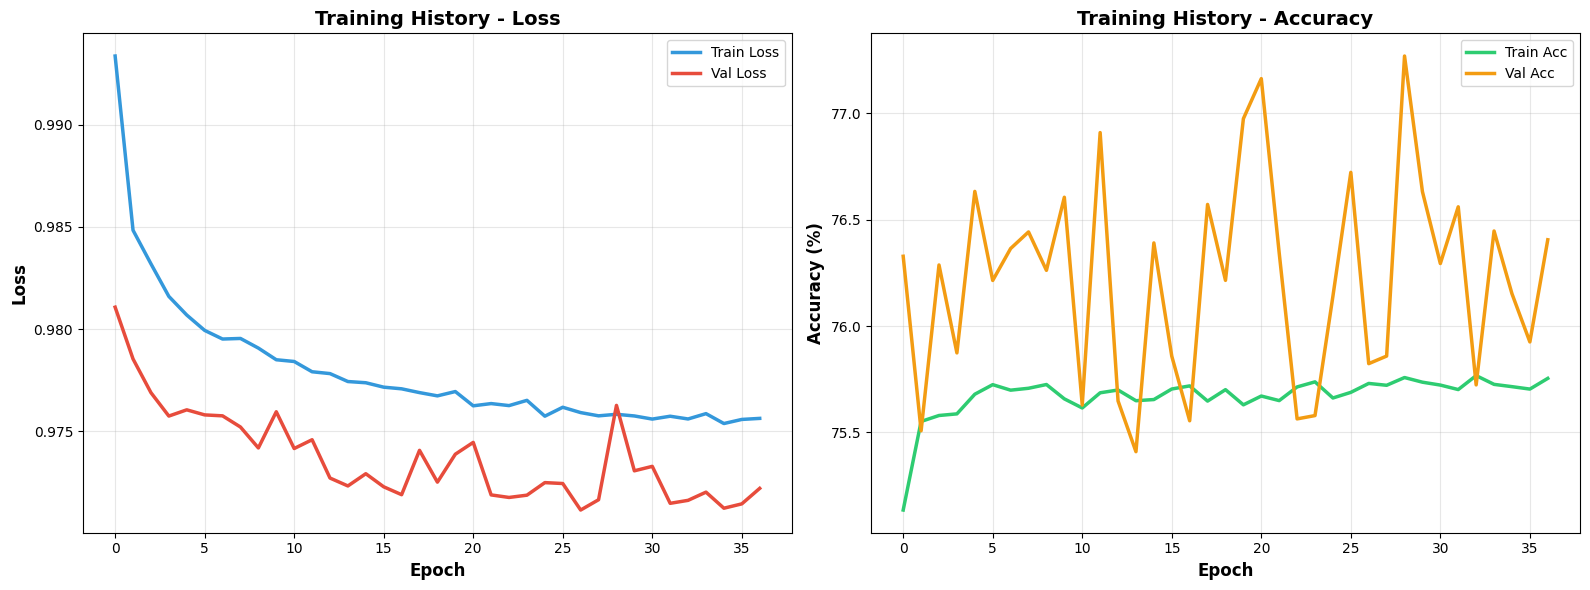


EVALUATION

📊 TEST SET PERFORMANCE
AUC-ROC:   0.7300 ⭐
F1-Score:  0.4420 ⭐
Accuracy:  0.6491
Precision: 0.3238
Recall:    0.6963
✓ Saved: evaluation_results.png


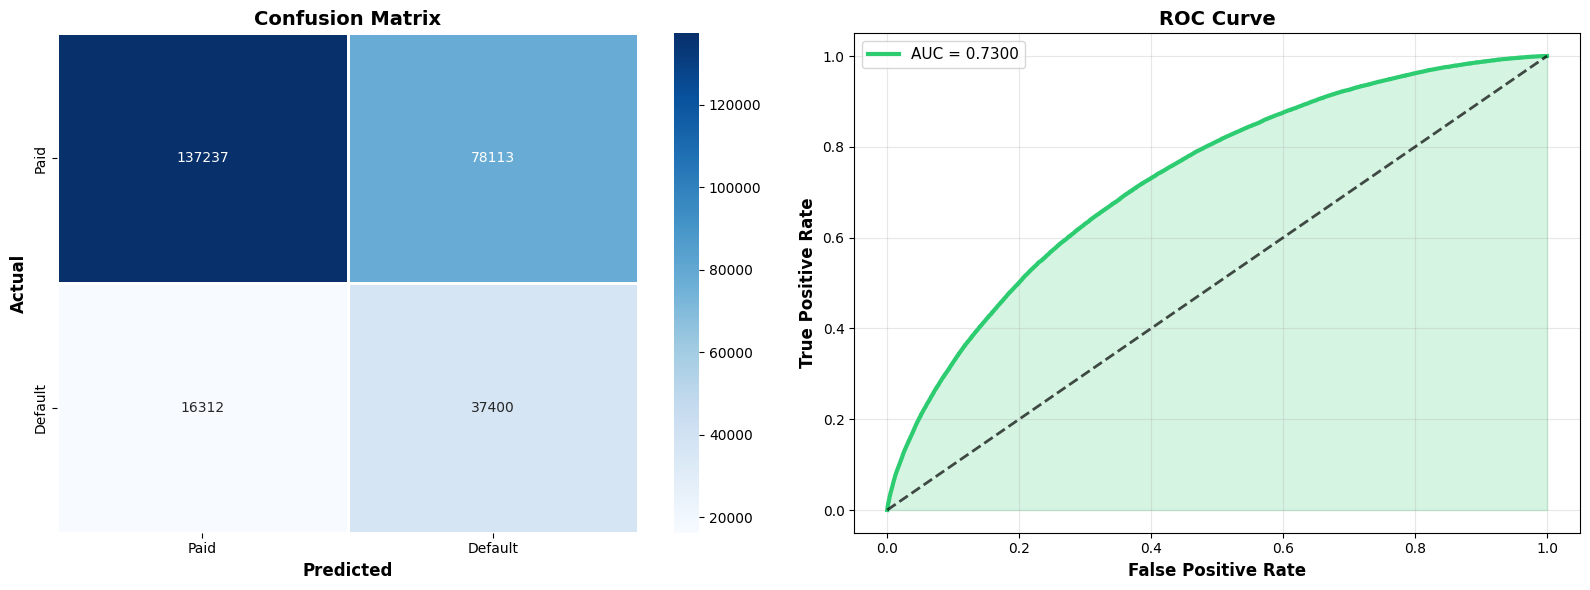


✓ Saved: loan_default_model.pth

🎉 TRAINING COMPLETE!

FINAL RESULTS FOR YOUR REPORT:
-------------------------------
✅ AUC-ROC:   0.7300  ⭐ PRIMARY METRIC
✅ F1-Score:  0.4420  ⭐ PRIMARY METRIC
   Accuracy:  0.6491
   Precision: 0.3238
   Recall:    0.6963

✅ Task 2 (Deep Learning) COMPLETE!
→ Proceed to Task 3: Offline Reinforcement Learning
    

✅ ALL DONE! Check the PNG files for visualizations.


In [3]:
!pip install torch torchvision scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🖥️  Using device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")

def prepare_data_from_splits(df_SHAP_train, df_SHAP_test):
    """Prepare data from pre-split datasets"""
    print(f"df_SHAP_train shape: {df_SHAP_train.shape}")
    print(f"df_SHAP_test shape: {df_SHAP_test.shape}")

    if 'target_binary' not in df_SHAP_train.columns:
        raise ValueError("target_binary column not found!")

    X_train = df_SHAP_train.drop('target_binary', axis=1).values
    y_train = df_SHAP_train['target_binary'].values
    X_test = df_SHAP_test.drop('target_binary', axis=1).values
    y_test = df_SHAP_test['target_binary'].values
    feature_names = df_SHAP_train.drop('target_binary', axis=1).columns.tolist()

    print(f"\n✓ X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"✓ X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"✓ Default rate (train): {y_train.mean()*100:.2f}%")
    print(f"✓ Default rate (test): {y_test.mean()*100:.2f}%")

    return X_train, X_test, y_train, y_test, feature_names

class LoanDefaultNN(nn.Module):

    def __init__(self, input_dim):
        super(LoanDefaultNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

def train_model(model, train_loader, val_loader, criterion, optimizer,
                num_epochs=50, device='cuda', patience=10):
    """Train with early stopping"""
    model = model.to(device)
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    print(f"\n{'Epoch':<8}{'Train Loss':<15}{'Train Acc':<15}{'Val Loss':<15}{'Val Acc':<15}")
    print("-" * 70)

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output.squeeze(), target.float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            predicted = (output.squeeze() > 0.5).float()
            train_correct += (predicted == target).sum().item()
            train_total += target.size(0)

        avg_train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total
        train_losses.append(avg_train_loss)
        train_accs.append(train_acc)

        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output.squeeze(), target.float())
                val_loss += loss.item()
                predicted = (output.squeeze() > 0.5).float()
                val_correct += (predicted == target).sum().item()
                val_total += target.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accs.append(val_acc)

        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"{epoch+1:<8}{avg_train_loss:<15.4f}{train_acc:<15.2f}"
                  f"{avg_val_loss:<15.4f}{val_acc:<15.2f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"\n⚠ Early stopping at epoch {epoch+1}")
                break

    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, train_losses, val_losses, train_accs, val_accs

def evaluate_model(model, test_loader, device='cuda'):
    """Evaluate model on test set"""
    model.eval()
    model = model.to(device)

    all_predictions, all_probabilities, all_targets = [], [], []

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            output = model(data)
            probabilities = output.squeeze().cpu().numpy()
            predictions = (probabilities > 0.5).astype(int)
            all_probabilities.extend(probabilities)
            all_predictions.extend(predictions)
            all_targets.extend(target.numpy())

    all_predictions = np.array(all_predictions)
    all_probabilities = np.array(all_probabilities)
    all_targets = np.array(all_targets)

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, zero_division=0)
    recall = recall_score(all_targets, all_predictions, zero_division=0)
    f1 = f1_score(all_targets, all_predictions)
    auc = roc_auc_score(all_targets, all_probabilities)
    cm = confusion_matrix(all_targets, all_predictions)

    print("\n" + "="*70)
    print(" TEST SET PERFORMANCE")
    print("="*70)
    print(f"AUC-ROC:   {auc:.4f} ⭐")
    print(f"F1-Score:  {f1:.4f} ⭐")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")

    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'f1_score': f1, 'auc_roc': auc, 'predictions': all_predictions,
        'probabilities': all_probabilities, 'targets': all_targets,
        'confusion_matrix': cm
    }
s
def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    """Plot training curves"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].plot(train_losses, label='Train Loss', linewidth=2.5, color='#3498db')
    axes[0].plot(val_losses, label='Val Loss', linewidth=2.5, color='#e74c3c')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axes[0].set_title('Training History - Loss', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    axes[1].plot(train_accs, label='Train Acc', linewidth=2.5, color='#2ecc71')
    axes[1].plot(val_accs, label='Val Acc', linewidth=2.5, color='#f39c12')
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Training History - Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: training_history.png")
    plt.show()

def plot_evaluation_results(results):
    """Plot confusion matrix and ROC curve"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    cm = results['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Paid', 'Default'], yticklabels=['Paid', 'Default'],
                linewidths=2, linecolor='white')
    axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Actual', fontsize=12, fontweight='bold')
    axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

    fpr, tpr, _ = roc_curve(results['targets'], results['probabilities'])
    axes[1].plot(fpr, tpr, linewidth=3, label=f'AUC = {results["auc_roc"]:.4f}', color='#2ecc71')
    axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.7)
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='#2ecc71')
    axes[1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('evaluation_results.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: evaluation_results.png")
    plt.show()


def complete_training_pipeline(df_SHAP_train, df_SHAP_test,
                               batch_size=512, num_epochs=50,
                               learning_rate=0.001, patience=10):

    print("\n" + "="*80)
    print("🚀 STARTING TRAINING PIPELINE")
    print("="*80)

    X_train, X_test, y_train, y_test, feature_names = prepare_data_from_splits(
        df_SHAP_train, df_SHAP_test
    )

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    print(f"\nClass weights: Paid={class_weights[0]:.4f}, Default={class_weights[1]:.4f}")

    train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
    test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    print(f"Batch size: {batch_size}, Train batches: {len(train_loader)}, Test batches: {len(test_loader)}")

    input_dim = X_train.shape[1]
    model = LoanDefaultNN(input_dim).to(device)
    print(f"\nModel: {sum(p.numel() for p in model.parameters()):,} parameters")

    pos_weight = torch.FloatTensor([class_weights[1]/class_weights[0]]).to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    model.network[-1] = nn.Identity()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)


    print("\n" + "="*80)
    print("TRAINING")
    print("="*80)
    model, train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, test_loader, criterion, optimizer,
        num_epochs, device, patience
    )


    model.network[-1] = nn.Sigmoid()

    plot_training_history(train_losses, val_losses, train_accs, val_accs)

    print("\n" + "="*80)
    print("EVALUATION")
    print("="*80)
    results = evaluate_model(model, test_loader, device)

    plot_evaluation_results(results)

    torch.save({
        'model_state_dict': model.state_dict(),
        'input_dim': input_dim,
        'feature_names': feature_names,
        'results': results
    }, 'loan_default_model.pth')
    print("\n✓ Saved: loan_default_model.pth")

    print("\n" + "="*80)
    print("🎉 TRAINING COMPLETE!")
    print("="*80)
    print(f"""
FINAL RESULTS FOR YOUR REPORT:
-------------------------------
✅ AUC-ROC:   {results['auc_roc']:.4f}  ⭐ PRIMARY METRIC
✅ F1-Score:  {results['f1_score']:.4f}  ⭐ PRIMARY METRIC
   Accuracy:  {results['accuracy']:.4f}
   Precision: {results['precision']:.4f}
   Recall:    {results['recall']:.4f}

✅ Task 2 (Deep Learning) COMPLETE!
→ Proceed to Task 3: Offline Reinforcement Learning
    """)

    return model, results, feature_names


print("\n" + "="*80)
print("READY TO TRAIN!")
print("="*80)
print("Execute: model, results, features = complete_training_pipeline(df_SHAP_train, df_SHAP_test)")
print("\nOr run now:")

model, results, features = complete_training_pipeline(
    df_SHAP_train=df_SHAP_train,
    df_SHAP_test=df_SHAP_test,
    batch_size=512,
    num_epochs=50,
    learning_rate=0.001,
    patience=10
)

print("\n✅ ALL DONE! Check the PNG files for visualizations.")

# Task 3

In [1]:
!pip install -q d3rlpy scikit-learn pandas numpy joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import joblib
import torch
from d3rlpy.dataset import MDPDataset, create_fifo_replay_buffer
from d3rlpy.algos import DQNConfig
from d3rlpy.constants import LoggingStrategy

from google.colab import drive
drive.mount('/content/drive')

TRAIN_PATH = '/content/drive/MyDrive/SHODH_AI/df_SHAP_train.csv'
TEST_PATH = '/content/drive/MyDrive/SHODH_AI/df_SHAP_test.csv'

print("Loading training data...")
train_df = pd.read_csv(TRAIN_PATH)
print(f"Train shape: {train_df.shape}")

print("Loading test data...")
test_df = pd.read_csv(TEST_PATH)
print(f"Test shape: {test_df.shape}")

print("\nTraining data preview:")
display(train_df.head())

TARGET_COL = "target_binary"
if TARGET_COL not in train_df.columns:
    raise KeyError(f"'{TARGET_COL}' column not found. Available columns: {train_df.columns.tolist()}")

print(f"\nTarget column '{TARGET_COL}' found.")
print(f"Target distribution in train:\n{train_df[TARGET_COL].value_counts()}")

YOUR_FEATURES = [
    'sub_grade_encoded',
    'term',
    'grade_encoded',
    'dti',
    'loan_to_income_ratio',
    'acc_open_past_24mths',
    'home_ownership_encoded',
    'state_default_rate',
    'fico_score',
    'mort_acc',
    'percent_bc_gt_75',
    'num_rev_tl_bal_gt_0',
    'total_il_high_credit_limit',
    'inq_last_6mths',
    'credit_history_years',
    'has_delinq',
    'purpose_small_business',
    'num_actv_bc_tl',
    'num_tl_op_past_12m'
]

missing_features = [f for f in YOUR_FEATURES if f not in train_df.columns]
if missing_features:
    print(f"\nWarning: Missing features: {missing_features}")
    print("Available columns:", train_df.columns.tolist())
    YOUR_FEATURES = [f for f in YOUR_FEATURES if f in train_df.columns]

print(f"\nUsing {len(YOUR_FEATURES)} features for RL model")
feature_cols = YOUR_FEATURES

la_col = None
for possible_col in ['loan_amnt', 'loan_amnt_capped', 'loan_amount']:
    if possible_col in train_df.columns:
        la_col = possible_col
        break

if la_col is None:
    raise KeyError("Loan amount column not found. Please specify the correct column name.")

int_col = None
for possible_col in ['int_rate', 'interest_rate', 'int_rate_pct']:
    if possible_col in train_df.columns:
        int_col = possible_col
        break

if int_col is None:
    print("Warning: Interest rate column not found. Will use default rate of 12%")

term_col = None
for possible_col in ['term', 'term_months']:
    if possible_col in train_df.columns:
        term_col = possible_col
        break

print(f"\nLoan amount column: {la_col}")
print(f"Interest rate column: {int_col}")
print(f"Term column: {term_col}")

RECOVERY_RATE = 0.35
USE_TERM = True
DEFAULT_INT_RATE = 12.0

def compute_reward_df(df):
    def _row_reward(r):
        la = float(r.get(la_col, 0.0))

        # Get interest rate
        if int_col and int_col in r.index:
            ir = float(r.get(int_col, DEFAULT_INT_RATE))
        else:
            ir = DEFAULT_INT_RATE

        # Get term
        if term_col and term_col in r.index:
            t = float(r.get(term_col, 36.0))
        else:
            t = 36.0

        # Check if loan was paid (0) or defaulted (1)
        paid = int(r[TARGET_COL] == 0)

        if paid:
            # Loan was fully paid - earn interest
            years = (t / 12.0) if USE_TERM else 1.0
            return la * (ir / 100.0) * years
        else:
            # Loan defaulted - lose principal minus recovery
            return -la * (1.0 - RECOVERY_RATE)

    return df.apply(_row_reward, axis=1)

# Compute rewards
print("\nComputing rewards...")
if "reward" not in train_df.columns:
    train_df["reward"] = compute_reward_df(train_df)
if "reward" not in test_df.columns:
    test_df["reward"] = compute_reward_df(test_df)

print(f"Reward statistics (train):")
print(train_df["reward"].describe())

def build_offline_arrays(df, features):
    X = df[features].astype(np.float32).values
    A = np.ones(len(df), dtype=np.int64)
    R = df["reward"].astype(np.float32).values
    T = np.ones(len(df), dtype=np.bool_)

    X_d = X.copy()
    A_d = np.zeros(len(df), dtype=np.int64)
    R_d = np.zeros(len(df), dtype=np.float32)
    T_d = np.ones(len(df), dtype=np.bool_)

    X_all = np.vstack([X, X_d])
    A_all = np.concatenate([A, A_d])
    R_all = np.concatenate([R, R_d])
    T_all = np.concatenate([T, T_d])

    return X_all, A_all, R_all, T_all

print("\nBuilding offline RL arrays...")
X_train, A_train, R_train, T_train = build_offline_arrays(train_df, feature_cols)
X_test, A_test, R_test, T_test = build_offline_arrays(test_df, feature_cols)

print(f"Train offline shape: X={X_train.shape}, A={A_train.shape}, R={R_train.shape}")
print(f"Test offline shape:  X={X_test.shape}, A={A_test.shape}, R={R_test.shape}")

print("\nCreating MDP datasets...")
train_mdp = MDPDataset(
    observations=X_train,
    actions=A_train,
    rewards=R_train,
    terminals=T_train
)
test_mdp = MDPDataset(
    observations=X_test,
    actions=A_test,
    rewards=R_test,
    terminals=T_test
)

import os
os.makedirs("rl_data", exist_ok=True)

joblib.dump(train_mdp, "rl_data/train_mdp.pkl")
joblib.dump(test_mdp, "rl_data/test_mdp.pkl")
print("Saved MDP datasets to rl_data/*.pkl")
print("\n" + "="*70)
print("TRAINING OFFLINE RL AGENT (DQN)")
print("="*70)

train_ds = joblib.load("rl_data/train_mdp.pkl")
test_ds = joblib.load("rl_data/test_mdp.pkl")

rb = create_fifo_replay_buffer(limit=150_000, episodes=train_ds.episodes)

cfg = DQNConfig(
    gamma=0.99,
    batch_size=512,
    learning_rate=1e-4,
    target_update_interval=8_000,
)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"\nUsing device: {device}")

algo = cfg.create(device=device, enable_ddp=False)

algo.build_with_dataset(rb)

print("\nTraining RL agent...")
history = algo.fit(
    dataset=rb,
    n_steps=250_000,
    n_steps_per_epoch=10_000,
    experiment_name="dqn_loan_approval",
    with_timestamp=False,
    logging_steps=2000,
    logging_strategy=LoggingStrategy.EPOCH,
    show_progress=True,
    save_interval=2,
)

print("\n✓ Training completed!")

print("\n" + "="*70)
print("EVALUATING RL POLICY")
print("="*70)

X_eval = test_df[feature_cols].astype(np.float32).values
print(f"\nEvaluation set size: {X_eval.shape[0]} applicants")

acts = algo.predict(X_eval).astype(int)

r_true = compute_reward_df(test_df).to_numpy(dtype=np.float32)

r_policy = np.where(acts == 1, r_true, 0.0)

print("\n" + "="*70)
print("RL AGENT PERFORMANCE METRICS")
print("="*70)

approval_rate = float((acts == 1).mean())
avg_reward = float(r_policy.mean())
total_reward = float(r_policy.sum())

print(f"\n{'Metric':<35} {'Value':>20}")
print("-" * 56)
print(f"{'Approval Rate':<35} {approval_rate:>19.2%}")
print(f"{'Average Reward per Applicant':<35} ${avg_reward:>18,.2f}")
print(f"{'Total Estimated Reward':<35} ${total_reward:>18,.2f}")

approved_mask = acts == 1
if approved_mask.sum() > 0:
    avg_reward_approved = float(r_true[approved_mask].mean())
    print(f"{'Avg Reward (Approved Only)':<35} ${avg_reward_approved:>18,.2f}")

approved_defaults = test_df[TARGET_COL].values[approved_mask]
if len(approved_defaults) > 0:
    default_rate = float((approved_defaults == 1).mean())
    print(f"{'Default Rate (Approved Loans)':<35} {default_rate:>19.2%}")

print("\n" + "="*70)

print("\nSaving trained model...")
algo.save_model("rl_data/dqn_loan_model.pt")
print("✓ Model saved to rl_data/dqn_loan_model.pt")

print("\n✓ All tasks completed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Mounted at /content/drive
Loading training data...
Train shape: (1076248, 41)
Loading test data...
Test shape: (269062, 41)

Training data preview:


,sub_grade_encoded,term,grade_encoded,dti,loan_to_income_ratio,acc_open_past_24mths,home_ownership_encoded,state_default_rate,fico_score,mort_acc,...,percent_bc_gt_75,num_rev_tl_bal_gt_0,total_il_high_credit_limit,inq_last_6mths,credit_history_years,has_delinq,purpose_small_business,num_actv_bc_tl,num_tl_op_past_12m,target_binary
0,-0.572803,1.773359,-0.576179,-0.931554,-0.014411,-0.213210,-1.185558,-0.175013,-0.508072,-0.836743,...,0.615249,0.459053,2.515945,-0.698334,-0.141278,-0.488716,-0.107949,-0.277925,-0.650524,1
1,-0.727776,-0.563901,-0.576179,0.204224,-0.013539,0.743918,-1.185558,-2.679042,2.158871,-0.836743,...,-1.280337,-0.816858,-0.178877,-0.698334,-0.918975,-0.488716,-0.107949,-1.189195,0.462228,0
2,-1.502640,-0.563901,-1.348037,-0.522074,-0.014587,0.743918,1.525150,-1.286198,-0.508072,0.179411,...,0.748821,0.140076,0.643959,0.367422,-0.722391,-0.488716,-0.107949,0.633344,-0.650524,0
3,0.047088,-0.563901,0.195680,0.390431,-0.014124,-1.170338,-1.185558,0.752164,0.590081,-0.836743,...,-0.333965,-1.135836,-0.271032,-0.698334,-1.357510,-0.488716,-0.107949,-0.733560,-1.206899,1
4,0.047088,-0.563901,0.195680,0.441616,-0.014592,-0.213210,0.621580,-1.444227,-0.821830,-0.328666,...,-0.061137,-0.178902,-0.235639,1.433178,-0.272695,-0.488716,-0.107949,-0.277925,-0.094148,0



Target column 'target_binary' found.
Target distribution in train:
target_binary
0    861401
1    214847
Name: count, dtype: int64

Using 19 features for RL model

Loan amount column: loan_amnt
Interest rate column: int_rate
Term column: term

Computing rewards...
Reward statistics (train):
count    1.076248e+06
mean    -1.681907e-02
std      2.952872e-01
min     -1.906878e+00
25%     -2.931619e-04
50%     -1.573106e-06
75%      3.588310e-04
max      1.007965e+00
Name: reward, dtype: float64

Building offline RL arrays...
Train offline shape: X=(2152496, 19), A=(2152496,), R=(2152496,)
Test offline shape:  X=(538124, 19), A=(538124,), R=(538124,)

Creating MDP datasets...
2025-10-26 08:54.17 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(19,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-26 08:54.17 [info     ] Ac

Epoch 1/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:11.40 [info     ] dqn_loan_approval: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.013987618446350098, 'time_algorithm_update': 0.004739577507972717, 'loss': 4.309069575925832e-05, 'time_step': 0.018861460995674133} step=10000


Epoch 2/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:14.52 [info     ] dqn_loan_approval: epoch=2 step=20000 epoch=2 metrics={'time_sample_batch': 0.014188859009742736, 'time_algorithm_update': 0.004745678782463074, 'loss': 3.9971598540503806e-06, 'time_step': 0.019075985288619996} step=20000
2025-10-26 09:14.52 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_20000.d3


Epoch 3/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:18.00 [info     ] dqn_loan_approval: epoch=3 step=30000 epoch=3 metrics={'time_sample_batch': 0.013937884545326233, 'time_algorithm_update': 0.004590518021583557, 'loss': 1.1312823250348103e-06, 'time_step': 0.018654351353645324} step=30000


Epoch 4/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:21.16 [info     ] dqn_loan_approval: epoch=4 step=40000 epoch=4 metrics={'time_sample_batch': 0.014390292024612427, 'time_algorithm_update': 0.004894311928749085, 'loss': 3.189738589152391e-07, 'time_step': 0.01942535696029663} step=40000
2025-10-26 09:21.16 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_40000.d3


Epoch 5/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:24.19 [info     ] dqn_loan_approval: epoch=5 step=50000 epoch=5 metrics={'time_sample_batch': 0.013689178419113159, 'time_algorithm_update': 0.004441570019721985, 'loss': 1.0015626535206935e-07, 'time_step': 0.018254021453857423} step=50000


Epoch 6/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:27.36 [info     ] dqn_loan_approval: epoch=6 step=60000 epoch=6 metrics={'time_sample_batch': 0.014404864168167114, 'time_algorithm_update': 0.004931073904037475, 'loss': 3.527635410192631e-08, 'time_step': 0.019478136134147644} step=60000
2025-10-26 09:27.36 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_60000.d3


Epoch 7/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:30.52 [info     ] dqn_loan_approval: epoch=7 step=70000 epoch=7 metrics={'time_sample_batch': 0.014419852542877197, 'time_algorithm_update': 0.004918044304847717, 'loss': 7.309925570851694e-09, 'time_step': 0.019480985760688782} step=70000


Epoch 8/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:34.03 [info     ] dqn_loan_approval: epoch=8 step=80000 epoch=8 metrics={'time_sample_batch': 0.014093563508987427, 'time_algorithm_update': 0.004736009907722473, 'loss': 2.0790122404438712e-09, 'time_step': 0.01896160428524017} step=80000
2025-10-26 09:34.03 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_80000.d3


Epoch 9/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:37.18 [info     ] dqn_loan_approval: epoch=9 step=90000 epoch=9 metrics={'time_sample_batch': 0.01438700873851776, 'time_algorithm_update': 0.004881193709373474, 'loss': 4.396308917846859e-10, 'time_step': 0.019411681485176087} step=90000


Epoch 10/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:40.34 [info     ] dqn_loan_approval: epoch=10 step=100000 epoch=10 metrics={'time_sample_batch': 0.014389141798019409, 'time_algorithm_update': 0.004896710681915283, 'loss': 3.854277026723793e-10, 'time_step': 0.01942764458656311} step=100000
2025-10-26 09:40.34 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_100000.d3


Epoch 11/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:43.47 [info     ] dqn_loan_approval: epoch=11 step=110000 epoch=11 metrics={'time_sample_batch': 0.014170215487480164, 'time_algorithm_update': 0.0048259111166000365, 'loss': 6.192508214805441e-11, 'time_step': 0.019137623476982116} step=110000


Epoch 12/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:46.59 [info     ] dqn_loan_approval: epoch=12 step=120000 epoch=12 metrics={'time_sample_batch': 0.014163983511924744, 'time_algorithm_update': 0.004808253812789917, 'loss': 4.8699907286497374e-11, 'time_step': 0.019112561917304993} step=120000
2025-10-26 09:46.59 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_120000.d3


Epoch 13/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:50.11 [info     ] dqn_loan_approval: epoch=13 step=130000 epoch=13 metrics={'time_sample_batch': 0.014117245554924012, 'time_algorithm_update': 0.004793670988082885, 'loss': 7.174208346300156e-11, 'time_step': 0.01905007402896881} step=130000


Epoch 14/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:53.23 [info     ] dqn_loan_approval: epoch=14 step=140000 epoch=14 metrics={'time_sample_batch': 0.014094698691368103, 'time_algorithm_update': 0.0047865189790725704, 'loss': 2.822875906489898e-11, 'time_step': 0.019013719606399537} step=140000
2025-10-26 09:53.23 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_140000.d3


Epoch 15/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:56.32 [info     ] dqn_loan_approval: epoch=15 step=150000 epoch=15 metrics={'time_sample_batch': 0.01399882559776306, 'time_algorithm_update': 0.0046963676691055296, 'loss': 3.866755003651226e-11, 'time_step': 0.018828747463226318} step=150000


Epoch 16/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 09:59.46 [info     ] dqn_loan_approval: epoch=16 step=160000 epoch=16 metrics={'time_sample_batch': 0.014172635316848755, 'time_algorithm_update': 0.004868061399459839, 'loss': 2.271780007118227e-11, 'time_step': 0.019172419810295105} step=160000
2025-10-26 09:59.46 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_160000.d3


Epoch 17/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:03.00 [info     ] dqn_loan_approval: epoch=17 step=170000 epoch=17 metrics={'time_sample_batch': 0.014298115777969361, 'time_algorithm_update': 0.004889427423477173, 'loss': 2.06684081659772e-11, 'time_step': 0.019321541762351988} step=170000


Epoch 18/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:06.06 [info     ] dqn_loan_approval: epoch=18 step=180000 epoch=18 metrics={'time_sample_batch': 0.01377441210746765, 'time_algorithm_update': 0.004535014247894287, 'loss': 1.9163009828208876e-11, 'time_step': 0.018434938740730284} step=180000
2025-10-26 10:06.06 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_180000.d3


Epoch 19/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:09.14 [info     ] dqn_loan_approval: epoch=19 step=190000 epoch=19 metrics={'time_sample_batch': 0.013872372579574585, 'time_algorithm_update': 0.004689222264289856, 'loss': 1.8585853218608395e-11, 'time_step': 0.018689162492752074} step=190000


Epoch 20/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:12.19 [info     ] dqn_loan_approval: epoch=20 step=200000 epoch=20 metrics={'time_sample_batch': 0.013693109035491943, 'time_algorithm_update': 0.004512045645713806, 'loss': 1.721563161182231e-11, 'time_step': 0.018330480527877807} step=200000
2025-10-26 10:12.19 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_200000.d3


Epoch 21/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:15.25 [info     ] dqn_loan_approval: epoch=21 step=210000 epoch=21 metrics={'time_sample_batch': 0.01374862265586853, 'time_algorithm_update': 0.004616607046127319, 'loss': 1.5819276007592425e-11, 'time_step': 0.018491069769859314} step=210000


Epoch 22/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:18.34 [info     ] dqn_loan_approval: epoch=22 step=220000 epoch=22 metrics={'time_sample_batch': 0.013940023398399353, 'time_algorithm_update': 0.004708327412605286, 'loss': 1.4365767818916956e-11, 'time_step': 0.01877695381641388} step=220000
2025-10-26 10:18.34 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_220000.d3


Epoch 23/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:21.33 [info     ] dqn_loan_approval: epoch=23 step=230000 epoch=23 metrics={'time_sample_batch': 0.013328611207008362, 'time_algorithm_update': 0.004314411783218384, 'loss': 1.357405097759274e-11, 'time_step': 0.01776208140850067} step=230000


Epoch 24/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:24.32 [info     ] dqn_loan_approval: epoch=24 step=240000 epoch=24 metrics={'time_sample_batch': 0.013312157678604126, 'time_algorithm_update': 0.004330840587615967, 'loss': 1.2553399165160938e-11, 'time_step': 0.01776083106994629} step=240000
2025-10-26 10:24.32 [info     ] Model parameters are saved to d3rlpy_logs/dqn_loan_approval/model_240000.d3


Epoch 25/25:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-26 10:27.34 [info     ] dqn_loan_approval: epoch=25 step=250000 epoch=25 metrics={'time_sample_batch': 0.013553533792495728, 'time_algorithm_update': 0.004424125552177429, 'loss': 1.1843206764092798e-11, 'time_step': 0.018097587084770203} step=250000

✓ Training completed!

EVALUATING RL POLICY

Evaluation set size: 269062 applicants

RL AGENT PERFORMANCE METRICS

Metric                                             Value
--------------------------------------------------------
Approval Rate                                    24.04%
Average Reward per Applicant        $             -0.01
Total Estimated Reward              $         -4,003.91
Avg Reward (Approved Only)          $             -0.06
Default Rate (Approved Loans)                    23.50%


Saving trained model...
✓ Model saved to rl_data/dqn_loan_model.pt

✓ All tasks completed successfully!
